In [18]:
#импорт библиотек
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os  

In [19]:
#variables
data='brl'

#импорт данных, сделать циклом
data = pd.read_csv(data+'/all_data.csv', sep=',')

display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           3892 non-null   object 
 1   USDBRL Curncy                  3756 non-null   float64
 2   BCN1W BGN Curncy               3567 non-null   float64
 3   EURUSD Curncy                  3892 non-null   float64
 4   GBPUSD Curncy                  3892 non-null   float64
 5   USDJPY Curncy                  3892 non-null   float64
 6   USDMXN Curncy                  3891 non-null   float64
 7   USOSFR2 Curncy                 3879 non-null   float64
 8   USOSFR10 Curncy                3851 non-null   float64
 9   CO1 Comdty                     3851 non-null   float64
 10  CU1 Comdty                     3620 non-null   float64
 11  XAU Curncy                     3885 non-null   float64
 12  BCNI3M Curncy                  3819 non-null   f

None

In [20]:
#конвертация данных
data['Date'] = pd.to_datetime(data['Date'], dayfirst=False)

display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3892 entries, 0 to 3891
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           3892 non-null   datetime64[ns]
 1   USDBRL Curncy                  3756 non-null   float64       
 2   BCN1W BGN Curncy               3567 non-null   float64       
 3   EURUSD Curncy                  3892 non-null   float64       
 4   GBPUSD Curncy                  3892 non-null   float64       
 5   USDJPY Curncy                  3892 non-null   float64       
 6   USDMXN Curncy                  3891 non-null   float64       
 7   USOSFR2 Curncy                 3879 non-null   float64       
 8   USOSFR10 Curncy                3851 non-null   float64       
 9   CO1 Comdty                     3851 non-null   float64       
 10  CU1 Comdty                     3620 non-null   float64       
 11  XAU Curncy       

None

In [21]:
data['USDBRL Curncy'].isna().any()

True

In [22]:
#заполнение или удаление пропущенных значений
display(data.describe())

,Date,USDBRL Curncy,BCN1W BGN Curncy,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
count,3892,3756.000000,3567.000000,3892.000000,3892.000000,3892.000000,3891.000000,3879.000000,3851.000000,3851.000000,...,3885.000000,3887.000000,3885.000000,3892.000000,3761.000000,3761.000000,3757.000000,3888.000000,3890.000000,3824.000000
mean,2014-07-18 02:23:33.360740096,2.922947,37.480443,1.257856,1.518348,102.812914,15.601971,1.151487,2.327050,76.689268,...,87.331350,188.649467,127.724837,9.046073,593.897368,457.844257,144.446247,2.037042,1.978203,5.871025
min,2007-02-01 00:00:00,1.539100,-29.150000,1.038800,1.148500,75.820000,9.858100,-0.009200,0.261200,19.330000,...,71.329000,61.333000,28.167000,3.772500,361.000000,293.500000,86.650000,0.750900,-0.024100,-144.600000
25%,2010-10-25 18:00:00,1.876500,22.500000,1.134100,1.327450,93.695000,12.770300,0.273700,1.558050,56.145000,...,80.073000,125.000000,97.500000,6.534375,487.750000,362.000000,116.400000,1.735100,1.741325,-24.550000
50%,2014-07-17 12:00:00,2.379150,29.580000,1.250600,1.524150,106.385000,13.877500,0.714200,2.104800,72.020000,...,86.041000,166.000000,115.500000,8.220000,550.000000,389.500000,132.200000,2.089350,2.058700,3.200000
75%,2018-04-10 06:00:00,3.757850,48.500000,1.358225,1.614525,111.412500,19.031200,1.460600,2.804600,102.905000,...,95.539000,225.000000,142.500000,10.828750,681.250000,553.250000,161.150000,2.364025,2.280825,35.825000
max,2021-12-31 00:00:00,5.887000,117.980000,1.599100,2.107500,125.630000,25.358800,5.475200,5.816300,146.080000,...,103.300000,630.000000,602.500000,28.885000,1280.000000,831.250000,304.900000,2.828700,2.752000,270.800000
std,NaN,1.207800,21.771200,0.130282,0.212699,12.730983,3.619277,1.202898,1.129537,25.599856,...,8.467502,86.934378,60.399308,3.550718,140.551064,131.822657,41.722612,0.403017,0.407659,52.111957


In [23]:
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0]
display(cols_with_null)

USDBRL Curncy                    3.494347
BCN1W BGN Curncy                 8.350462
USDMXN Curncy                    0.025694
USOSFR2 Curncy                   0.334018
USOSFR10 Curncy                  1.053443
CO1 Comdty                       1.053443
CU1 Comdty                       6.988695
XAU Curncy                       0.179856
BCNI3M Curncy                    1.875642
VIX Index                        3.468654
ES1 Index                        3.288798
NQ1 Index                        3.263104
IBOV Index                       5.241521
DXY Curncy                       0.179856
BRAZIL CDS USD SR 5Y D14 Corp    0.128469
MEX CDS USD SR 5Y D14 Corp       0.179856
W 1 COMB Comdty                  3.365879
C 1 COMB Comdty                  3.365879
KC1 Comdty                       3.468654
USGGBE2 Index                    0.102775
USGGBE10 Index                   0.051387
CESIUSD Index                    1.747174
dtype: float64

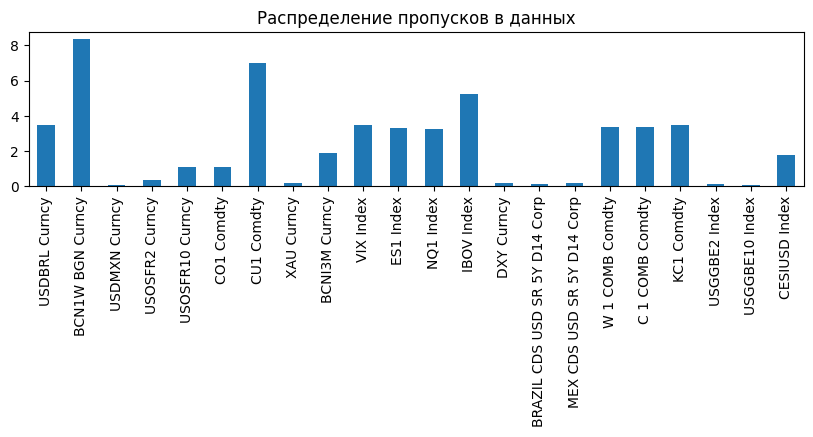

In [24]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 2),
    title='Распределение пропусков в данных'
);

In [25]:
display(data.head())

,Date,USDBRL Curncy,BCN1W BGN Curncy,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,2007-02-01,2.1004,25.0,1.3022,1.9668,120.82,10.9713,5.2437,5.2140,56.72,...,84.64,96.129,42.240,6.200,460.25,398.00,118.75,2.6056,2.4119,65.6
1,2007-02-02,2.1043,25.0,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,...,84.96,93.119,39.825,5.975,461.25,402.00,118.35,2.5953,2.4049,58.5
2,2007-02-05,2.0933,25.0,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,...,85.08,93.125,39.500,5.750,458.50,402.00,116.60,2.5875,2.3990,61.3
3,2007-02-06,2.0859,25.0,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,...,84.77,91.151,39.510,5.850,451.00,396.50,116.50,2.5513,2.3695,60.4
4,2007-02-07,2.0925,25.0,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,...,84.71,90.119,39.396,5.850,452.00,392.25,116.85,2.5488,2.3596,60.4


In [26]:
drop_data = data.copy()

In [27]:
#удаление пустых строчек
drop_data = drop_data.dropna(how='all')

In [28]:
#удаление пропусков спота из-за выходных и праздников
drop_data = drop_data.dropna(subset=['USDBRL Curncy'])


In [29]:
#добавление предыдущих форвард пойнтов в пустые места
drop_data['BCN1W BGN Curncy'] = drop_data['BCN1W BGN Curncy'].fillna(method='ffill')

In [30]:
#замена значений пропущенных значений признаков скользящим средним

window_size = 2  # Размер окна для вычисления скользящего среднего
for col in drop_data.select_dtypes(include=['int', 'float']):
    while drop_data[col].isnull().any(): 
        # Вычисляем скользящее среднее, игнорируя пропущенные значения
        drop_data[col] = drop_data[col].rolling(window=window_size, min_periods=1).mean()

In [31]:
drop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3756 entries, 0 to 3891
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           3756 non-null   datetime64[ns]
 1   USDBRL Curncy                  3756 non-null   float64       
 2   BCN1W BGN Curncy               3756 non-null   float64       
 3   EURUSD Curncy                  3756 non-null   float64       
 4   GBPUSD Curncy                  3756 non-null   float64       
 5   USDJPY Curncy                  3756 non-null   float64       
 6   USDMXN Curncy                  3756 non-null   float64       
 7   USOSFR2 Curncy                 3756 non-null   float64       
 8   USOSFR10 Curncy                3756 non-null   float64       
 9   CO1 Comdty                     3756 non-null   float64       
 10  CU1 Comdty                     3756 non-null   float64       
 11  XAU Curncy            

In [32]:
#вычисление таргета

drop_data['target'] = (drop_data['USDBRL Curncy'].shift(1) - (drop_data['USDBRL Curncy'] + (drop_data['BCN1W BGN Curncy'] / 10000))) / drop_data['USDBRL Curncy'].shift(1)

#перенос последнего столбца на 4-тое место
new_columns = drop_data.columns[:-1].to_list()
new_columns.insert(1, 'target')
t_data_0 = drop_data[new_columns]
#удаление 'USDBRL Curncy' и 'BCN1W BGN Curncy' 
t_data = t_data_0.copy()
t_data.drop(['USDBRL Curncy', 'BCN1W BGN Curncy'], axis=1, inplace=True)
t_data.drop(0, axis=0, inplace=True)

In [33]:
t_data.head()

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
1,2007-02-02,-0.003047,1.2961,1.9660,121.14,10.9632,5.22620,5.207125,57.565,55033.750000,...,84.800,94.624,41.0325,5.975,460.750,400.000,118.6500,2.60045,2.40840,63.825
2,2007-02-05,0.004039,1.2929,1.9603,120.34,10.9228,5.19870,5.186375,58.255,54975.312500,...,85.020,93.122,39.6625,5.750,459.875,402.000,118.0125,2.59140,2.40195,60.975
3,2007-02-06,0.002341,1.2985,1.9711,120.10,10.9223,5.17620,5.155850,58.260,54742.890625,...,84.925,92.138,39.5050,5.850,454.750,399.250,117.0125,2.56940,2.38425,60.375
4,2007-02-07,-0.004363,1.3012,1.9707,120.68,10.9555,5.15370,5.124675,57.825,54234.765625,...,84.740,90.635,39.4530,5.850,451.500,394.375,116.6125,2.55005,2.36455,60.625
5,2007-02-08,-0.001410,1.3042,1.9589,121.03,10.9502,5.14545,5.104525,58.130,53584.843750,...,84.700,91.366,39.8670,5.875,454.500,396.000,116.4375,2.54170,2.35255,60.425


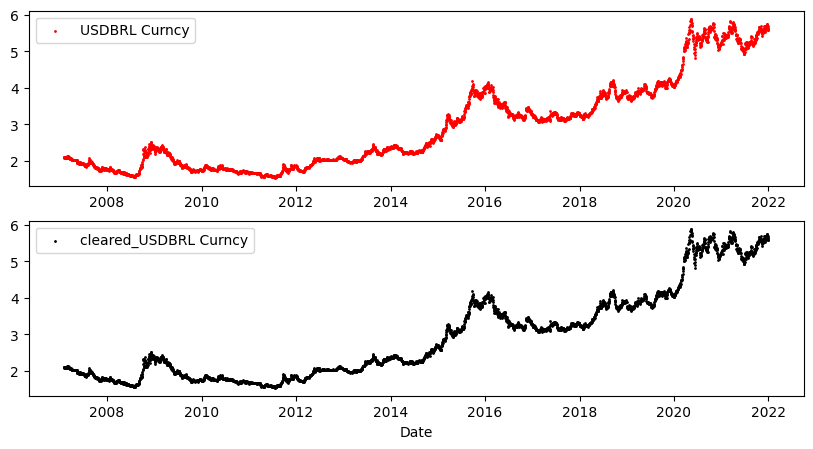

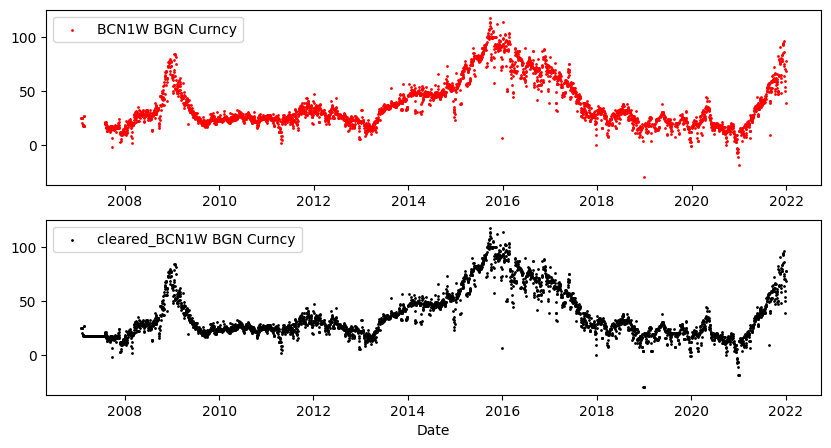

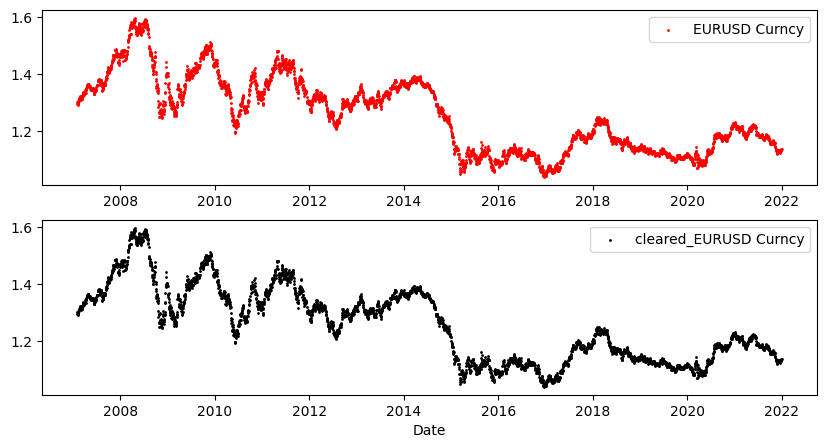

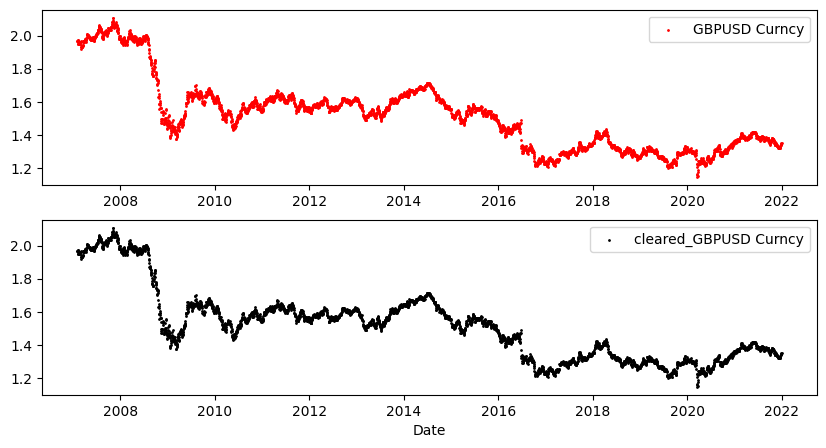

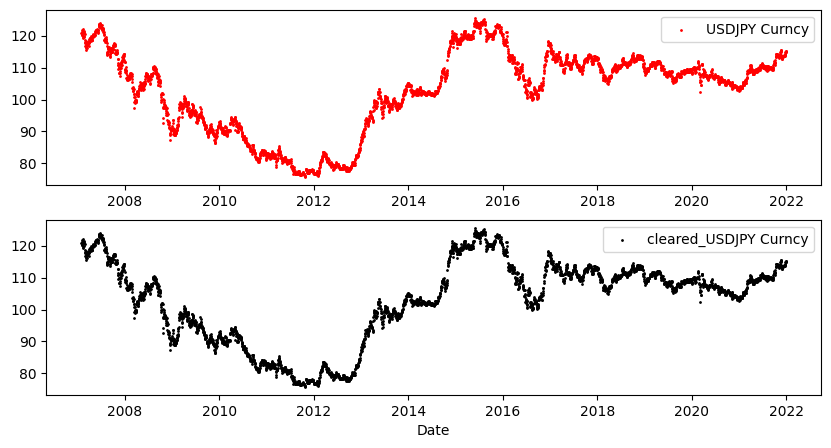

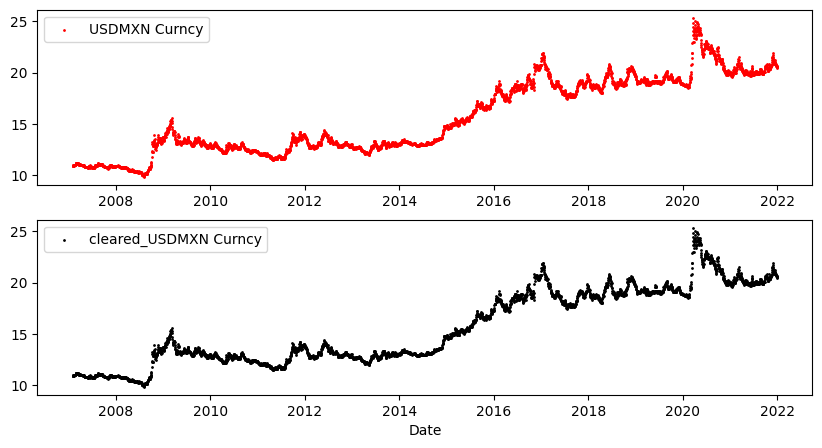

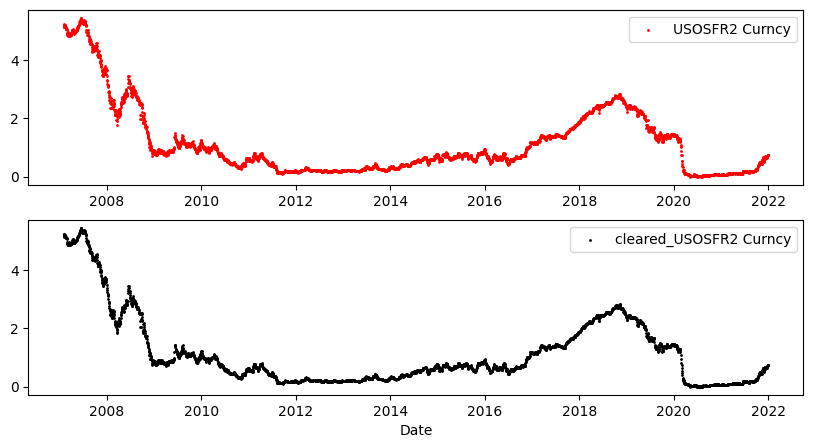

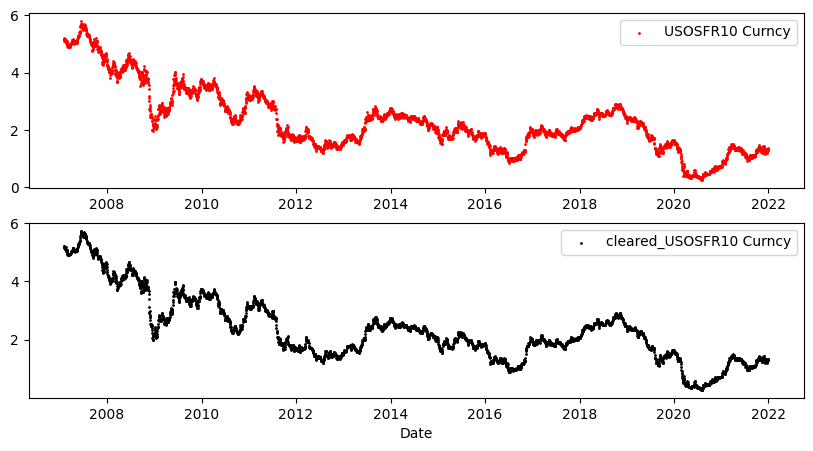

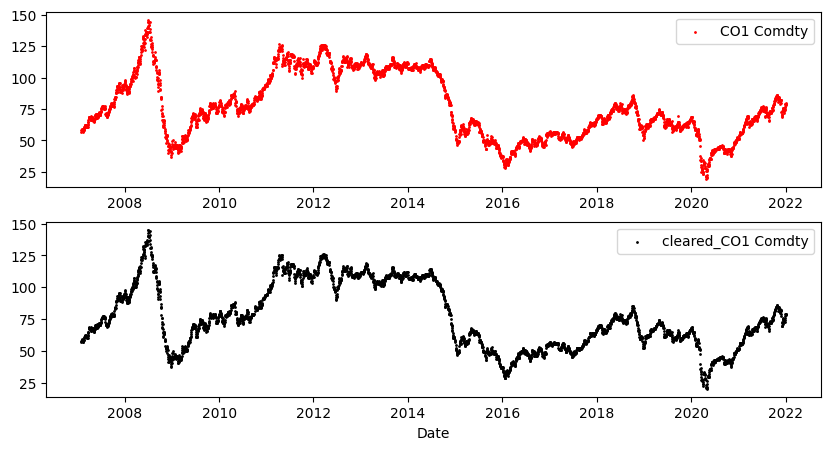

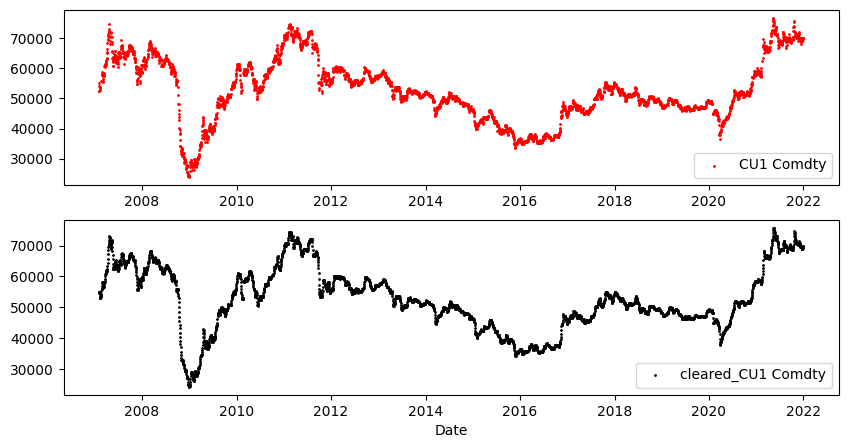

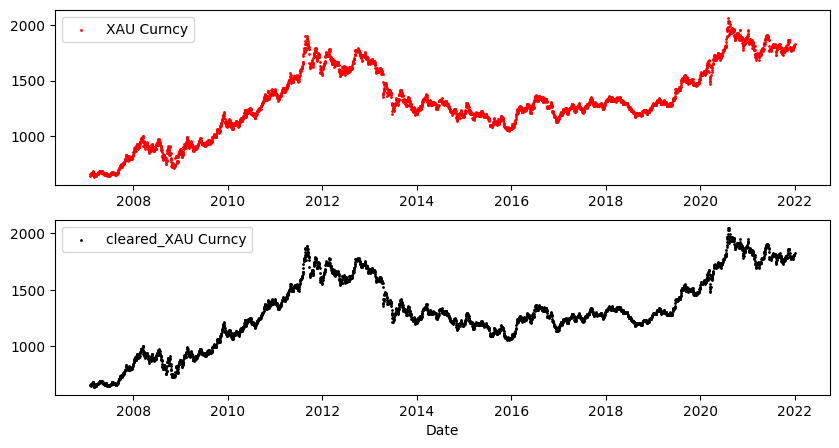

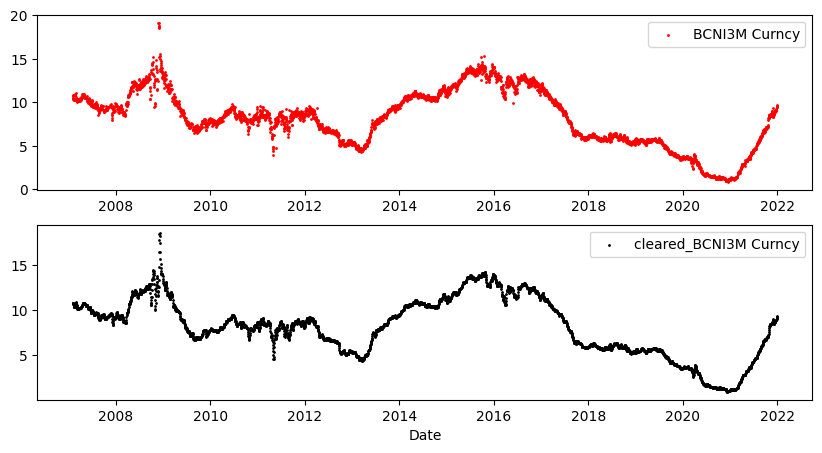

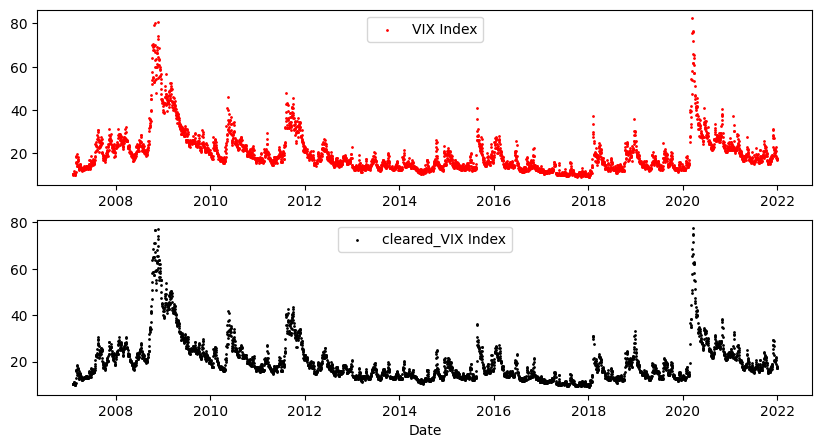

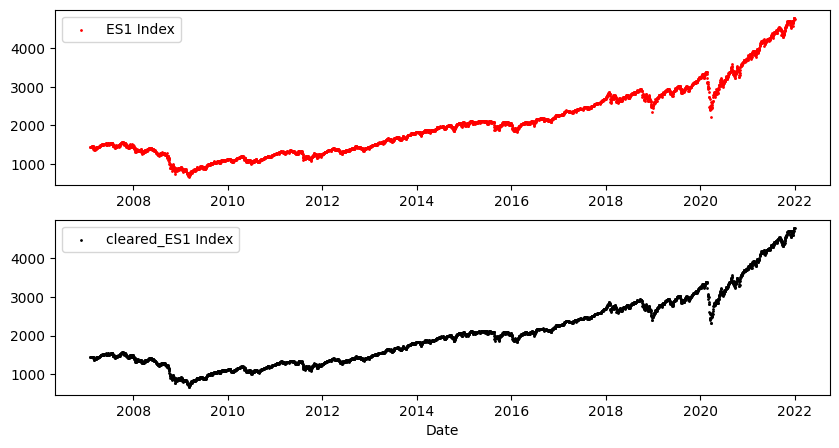

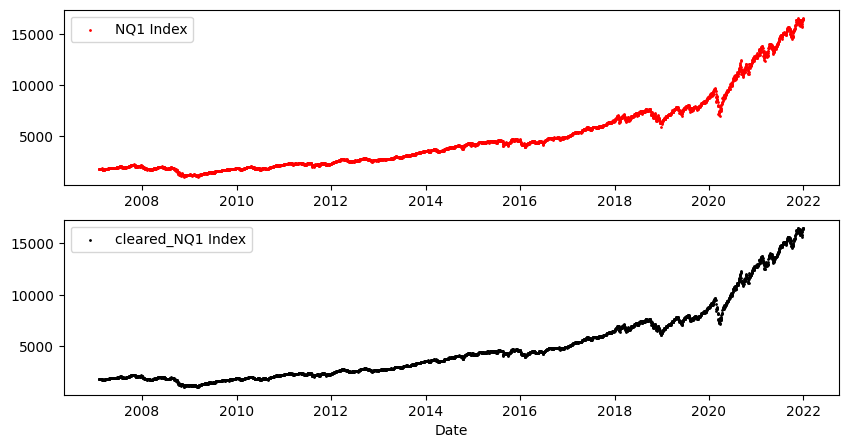

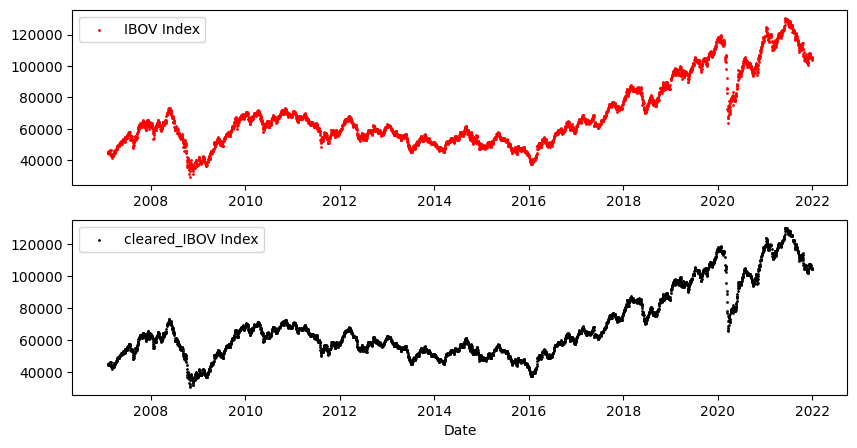

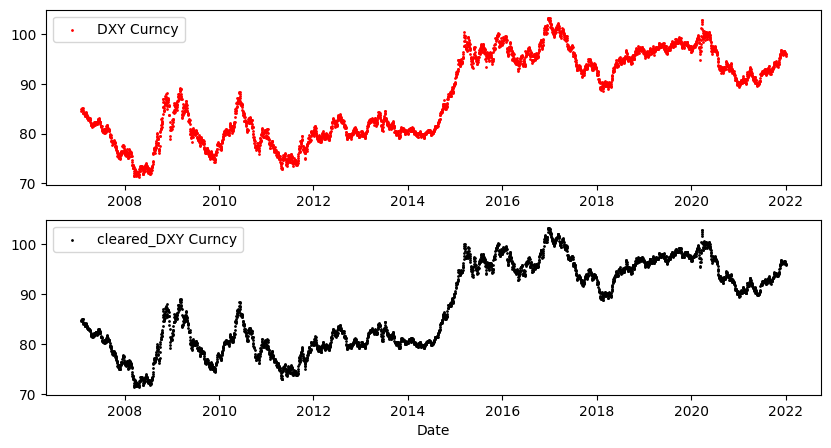

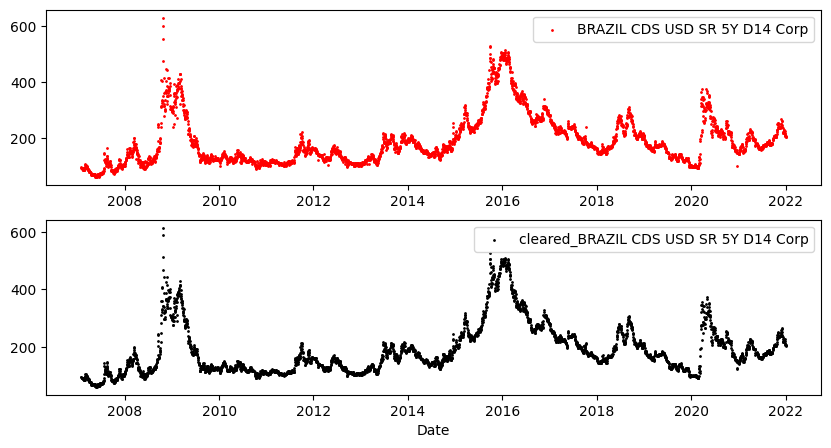

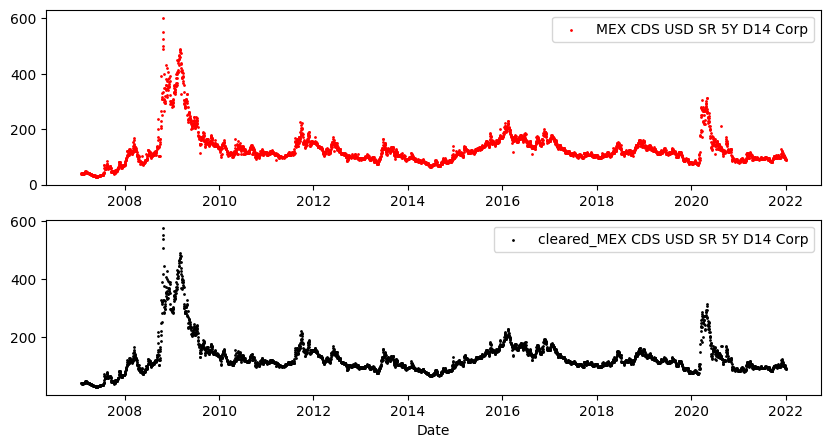

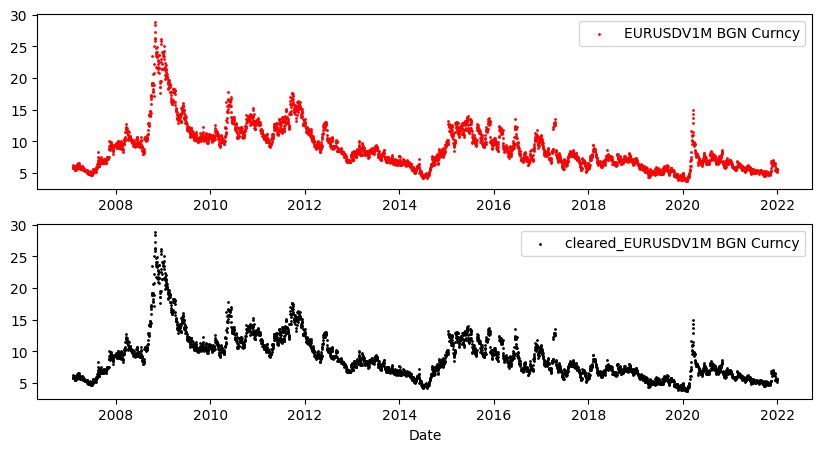

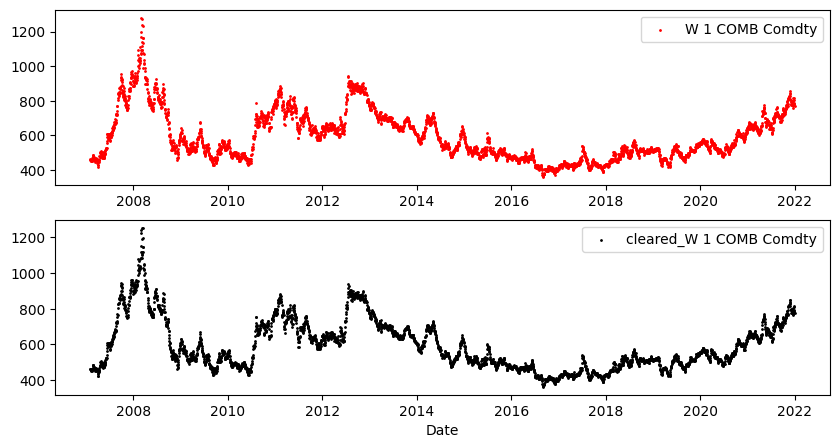

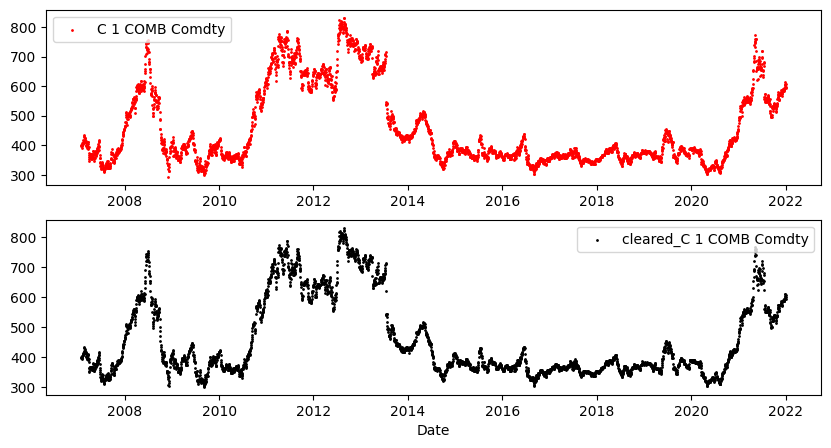

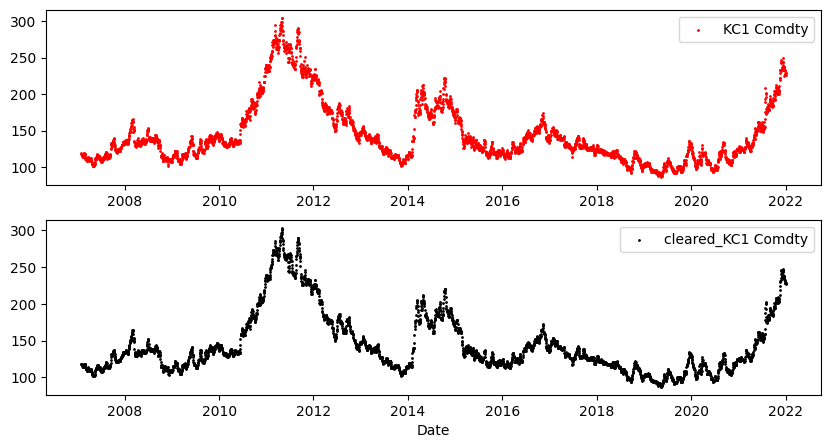

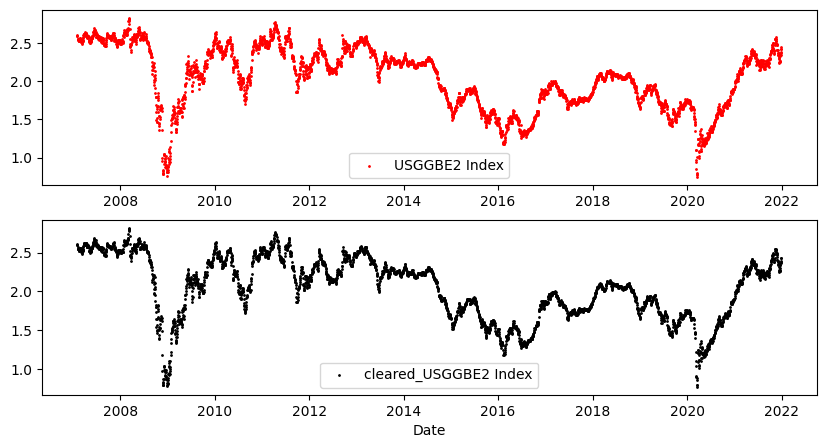

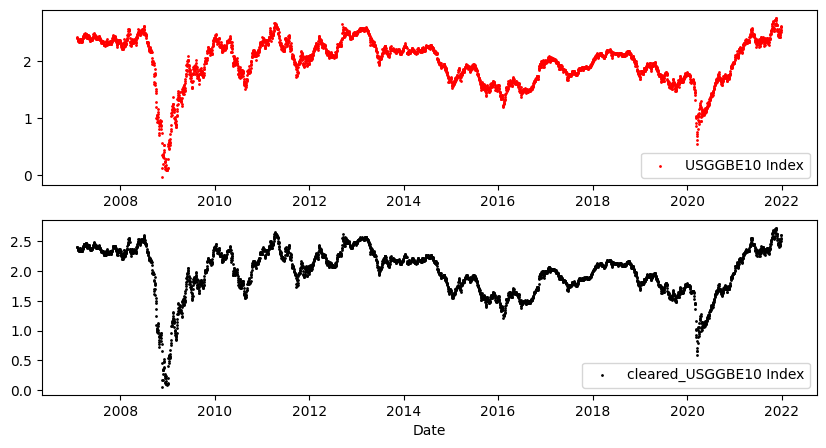

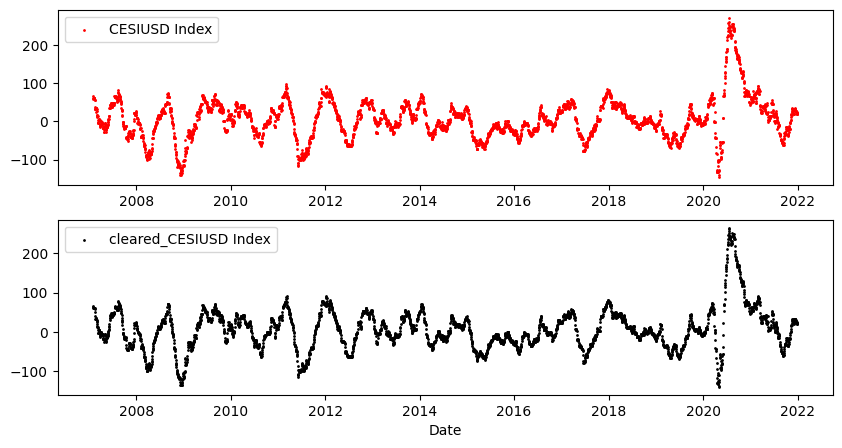

In [34]:
# построение графиков разпределения признаков для различных классов

# Перебор столбцов и построение графиков
for column in data.columns:
    if column not in ['Date']:
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
        axes[0].scatter(
        x=data['Date'],
        y=data[column],
        s=1,
        marker='o',
        c = 'red',
        label=column
        );

        axes[1].scatter(
        x=drop_data['Date'],
        y=drop_data[column],
        s=1,
        marker='o',
        c = 'black',
        label="cleared_"+column
        );
    
                # Настройка осей и заголовка
        plt.xlabel('Date')
        #axes[0].set_ylabel(column)
        #axes[1].set_ylabel(column)
            
        # Добавление легенды
        axes[0].legend()
        axes[1].legend()
                
                    # Отображение графика
        plt.show()

In [35]:
t_data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,3755,2014-07-08 11:38:19.973368832,2007-02-02 00:00:00,2010-10-07 12:00:00,2014-07-08 00:00:00,2018-04-04 12:00:00,2021-12-31 00:00:00,NaN
target,3755.0,-0.001678,-0.075442,-0.007395,-0.001411,0.004298,0.071185,0.010889
EURUSD Curncy,3755.0,1.258497,1.0388,1.13435,1.2522,1.3582,1.5991,0.130578
GBPUSD Curncy,3755.0,1.519207,1.1485,1.3276,1.5245,1.6154,2.1075,0.213213
USDJPY Curncy,3755.0,102.796594,75.82,93.77,106.28,111.38,125.63,12.707061
USDMXN Curncy,3755.0,15.585451,9.8581,12.7657,13.8284,19.0283,25.3588,3.618972
USOSFR2 Curncy,3755.0,1.154014,-0.0037,0.2742,0.7157,1.4602,5.4602,1.20313
USOSFR10 Curncy,3755.0,2.329444,0.282125,1.559475,2.1043,2.815438,5.742025,1.129686
CO1 Comdty,3755.0,76.691268,20.225,56.105,71.97,103.1125,145.25,25.568346
CU1 Comdty,3755.0,52444.799018,24221.09375,46698.4375,51496.5625,59231.875,75832.65625,10284.776213


In [36]:
#преобразование даты в секунды

# Преобразование datetime в секунды
t_data['Date'] = t_data['Date'].apply(lambda x: x.timestamp())

In [92]:
t_data=t_data.reset_index()

In [96]:
t_data=t_data.drop('index', axis=1)

In [98]:
t_data

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,1.170374e+09,-0.003047,1.2961,1.9660,121.14,10.9632,5.22620,5.207125,57.565,55033.750000,...,84.8000,94.624,41.0325,5.9750,460.750,400.000,118.6500,2.60045,2.40840,63.825
1,1.170634e+09,0.004039,1.2929,1.9603,120.34,10.9228,5.19870,5.186375,58.255,54975.312500,...,85.0200,93.122,39.6625,5.7500,459.875,402.000,118.0125,2.59140,2.40195,60.975
2,1.170720e+09,0.002341,1.2985,1.9711,120.10,10.9223,5.17620,5.155850,58.260,54742.890625,...,84.9250,92.138,39.5050,5.8500,454.750,399.250,117.0125,2.56940,2.38425,60.375
3,1.170806e+09,-0.004363,1.3012,1.9707,120.68,10.9555,5.15370,5.124675,57.825,54234.765625,...,84.7400,90.635,39.4530,5.8500,451.500,394.375,116.6125,2.55005,2.36455,60.625
4,1.170893e+09,-0.001410,1.3042,1.9589,121.03,10.9502,5.14545,5.104525,58.130,53584.843750,...,84.7000,91.366,39.8670,5.8750,454.500,396.000,116.4375,2.54170,2.35255,60.425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,1.640563e+09,0.006993,1.1328,1.3441,114.87,20.6894,0.72825,1.294425,77.725,69122.109375,...,96.0560,210.000,92.5000,5.6325,809.375,610.250,230.7500,2.35985,2.51425,24.700
3751,1.640650e+09,0.000031,1.1310,1.3434,114.82,20.6460,0.73800,1.294925,78.770,69318.437500,...,96.1475,207.000,92.0000,5.5575,793.750,609.750,227.7250,2.37555,2.53175,22.850
3752,1.640736e+09,-0.012887,1.1349,1.3490,114.95,20.5711,0.74185,1.309775,79.085,69532.109375,...,96.0655,206.500,92.0000,5.5550,785.625,605.125,226.7875,2.39385,2.55790,21.575
3753,1.640822e+09,0.020322,1.1325,1.3499,115.08,20.4626,0.73795,1.333900,79.275,69735.703125,...,95.9485,206.000,91.0000,5.4900,783.750,600.750,228.0625,2.42945,2.59925,20.425


([<matplotlib.axis.XTick at 0x149ee6298d0>,
 [Text(1.0, 0, '1/Year'), Text(365.2524, 0, '1/day')])

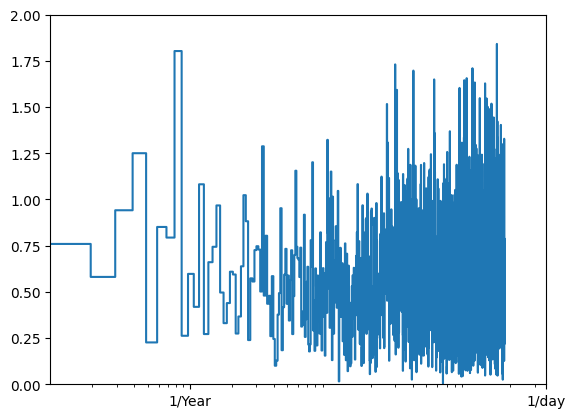

In [99]:
#фурье, поиск переодичности
fft = tf.signal.rfft(t_data['target'])
f_per_dataset = np.arange(0, len(fft))

n_samples_d = len(t_data['target'])
days_per_year = 365.2524
years_per_dataset = n_samples_d/(days_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 2)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
#_ = plt.xlabel('Frequency (log scale)')

In [100]:
#разбиение данных
column_indices = {name: i for i, name in enumerate(t_data.columns)}

n = len(t_data)
train_df = t_data[0:int(n*0.7)]
val_df = t_data[int(n*0.7):int(n*0.9)]
test_df = t_data[int(n*0.9):]

num_features = t_data.shape[1]


In [101]:
#нормализация данных
#приведение таргета к диапазону от -5 до 5
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
#train_df['target']=(train_df['target']-train_df['target'].min())*(10/(train_df['target'].max()-train_df['target'].min()))-5
val_df = (val_df - train_mean) / train_std
#val_df['target']=(val_df['target']-val_df['target'].min())*(10/(val_df['target'].max()-val_df['target'].min()))-5
test_df = (test_df - train_mean) / train_std
#test_df['target']=(test_df['target']-test_df['target'].min())*(10/(test_df['target'].max()-test_df['target'].min()))-5


C:\Users\USER\AppData\Local\Temp\ipykernel_25936\3356771336.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(train_df.keys(), rotation=90)


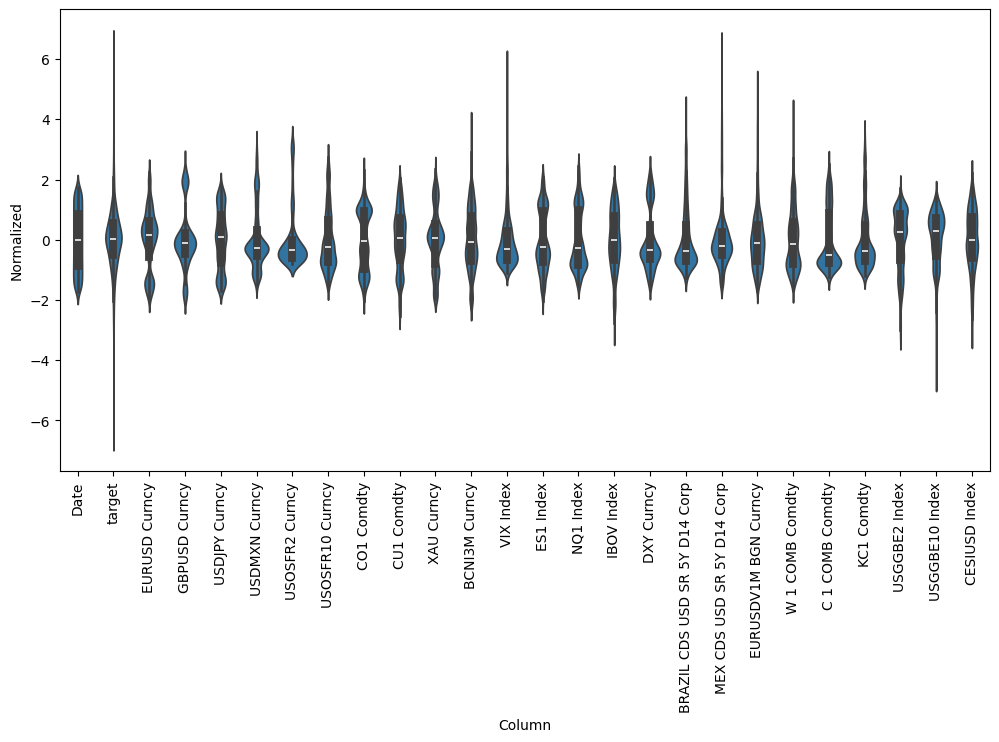

In [102]:
import seaborn as sns

df_std = train_df.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(train_df.keys(), rotation=90)

In [103]:
val_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Date,751.0,2.234940,0.287427,1.738267,1.987924,2.236672,2.482691,2.732348
target,751.0,0.051558,0.881725,-3.209145,-0.473128,0.059014,0.554371,4.573950
EURUSD Curncy,751.0,-1.170986,0.312782,-1.757741,-1.411659,-1.242396,-0.956010,-0.380970
GBPUSD Curncy,751.0,-1.550598,0.248299,-2.319444,-1.699987,-1.548801,-1.437694,-0.871507
USDJPY Curncy,751.0,0.693823,0.155816,0.166648,0.575710,0.685286,0.810717,1.024232
USDMXN Curncy,751.0,2.240060,0.567192,1.451874,1.966224,2.093001,2.287585,4.520689
USOSFR2 Curncy,751.0,0.483045,0.580574,-0.871955,0.204497,0.500543,0.966716,1.324461
USOSFR10 Curncy,751.0,-0.657601,0.603729,-2.065417,-1.023825,-0.556561,-0.166921,0.241698
CO1 Comdty,751.0,-0.789253,0.470933,-2.334815,-0.936814,-0.724652,-0.487410,0.092227
CU1 Comdty,751.0,-0.298097,0.284985,-1.296400,-0.460097,-0.289543,-0.110458,0.285468


In [104]:
#создание класса окна
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [105]:
w1 = WindowGenerator(input_width=7, label_width=1, shift=1,
                     label_columns=['target'])
w1

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['target']

In [106]:
w2 = WindowGenerator(input_width=7, label_width=1, shift=1,
                     label_columns=['target'])
w2

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['target']

In [107]:
#сплит с учетом 
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [108]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 8, 26)
Inputs shape: (3, 7, 26)
Labels shape: (3, 1, 1)


In [109]:
w2.example = example_inputs, example_labels

In [110]:
def plot(self, model=None, plot_col='target', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('days')

WindowGenerator.plot = plot

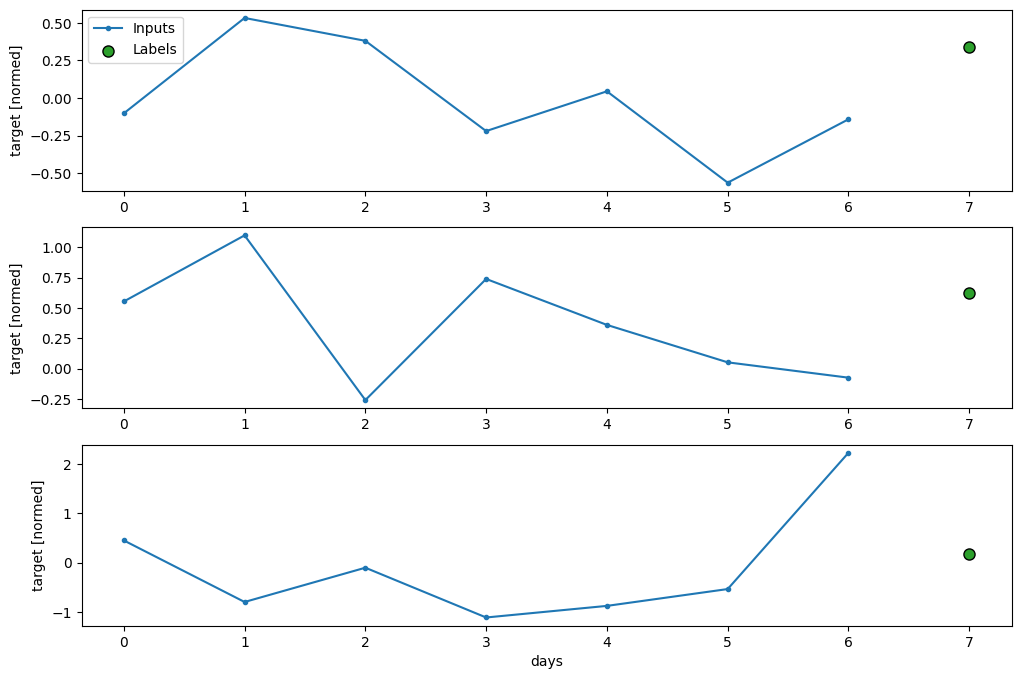

In [111]:
w2.plot()


In [112]:
# создание tf.data.Dataset
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=20,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [113]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [114]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 7, 26), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [115]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (20, 7, 26)
Labels shape (batch, time, features): (20, 1, 1)


In [116]:
#Одноступенчатые модели

In [135]:
single_step_window = WindowGenerator(
    input_width=7, label_width=1, shift=1,
    label_columns=['target'])
single_step_window

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['target']

In [136]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (20, 7, 26)
Labels shape (batch, time, features): (20, 1, 1)


In [137]:
#базовый прогноз, озвращает текущую цену в качестве прогноза, прогнозируя «без изменений»
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]


In [138]:
baseline = Baseline(label_index=column_indices['target'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)


38/38 [==============================] - 0s 2ms/step - loss: 1.5297 - mean_absolute_error: 0.9205


In [157]:
wide_window = WindowGenerator(
    input_width=20, label_width=20, shift=1,
    label_columns=['target'])

wide_window

Total window size: 21
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Label column name(s): ['target']

In [158]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 20, 26)
Output shape: (20, 20, 1)


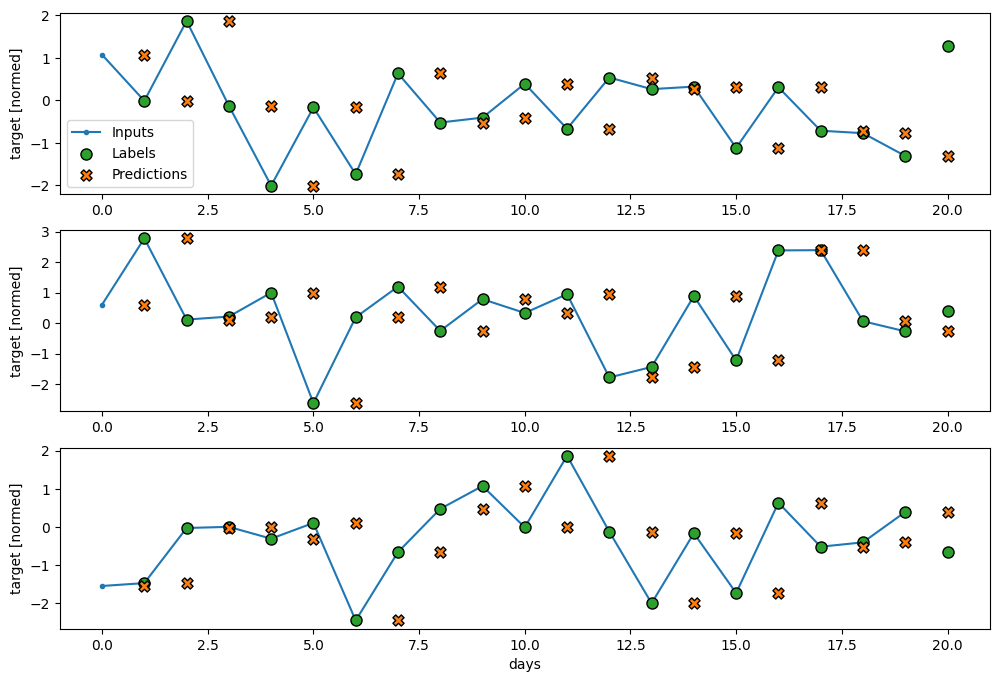

In [159]:
wide_window.plot(baseline)
#это просто метки, сдвинутые вправо на один день
    #Синяя линия Inputs показывает входную температуру на каждом временном шаге. Модель получает все функции, этот график показывает только температуру.
    #Зеленые точки Labels показывают целевое значение прогноза. Эти точки отображаются во время прогнозирования, а не во время ввода. Поэтому диапазон меток смещен на 1 шаг относительно входов.
    #Оранжевые кресты Predictions — это прогнозы модели для каждого выходного временного шага. Если бы модель предсказывала идеально, прогнозы попадали бы прямо в Labels .

In [160]:
# линейная модель
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])


In [161]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)


Input shape: (20, 7, 26)
Output shape: (20, 7, 1)


In [172]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=30):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [173]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)


Epoch 1/100
132/132 [==============================] - 1s 6ms/step - loss: 1.0077 - mean_absolute_error: 0.7089 - val_loss: 0.8123 - val_mean_absolute_error: 0.6783
Epoch 2/100
132/132 [==============================] - 1s 4ms/step - loss: 1.0066 - mean_absolute_error: 0.7070 - val_loss: 0.8143 - val_mean_absolute_error: 0.6800
Epoch 3/100
132/132 [==============================] - 0s 3ms/step - loss: 1.0061 - mean_absolute_error: 0.7061 - val_loss: 0.8000 - val_mean_absolute_error: 0.6727
Epoch 4/100
132/132 [==============================] - 0s 3ms/step - loss: 1.0052 - mean_absolute_error: 0.7056 - val_loss: 0.8028 - val_mean_absolute_error: 0.6747
Epoch 5/100
132/132 [==============================] - 0s 3ms/step - loss: 1.0046 - mean_absolute_error: 0.7055 - val_loss: 0.7992 - val_mean_absolute_error: 0.6732
Epoch 6/100
132/132 [==============================] - 1s 4ms/step - loss: 1.0044 - mean_absolute_error: 0.7059 - val_loss: 0.7945 - val_mean_absolute_error: 0.6707
Epoch 7/10

In [164]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 20, 26)
Output shape: (20, 20, 1)


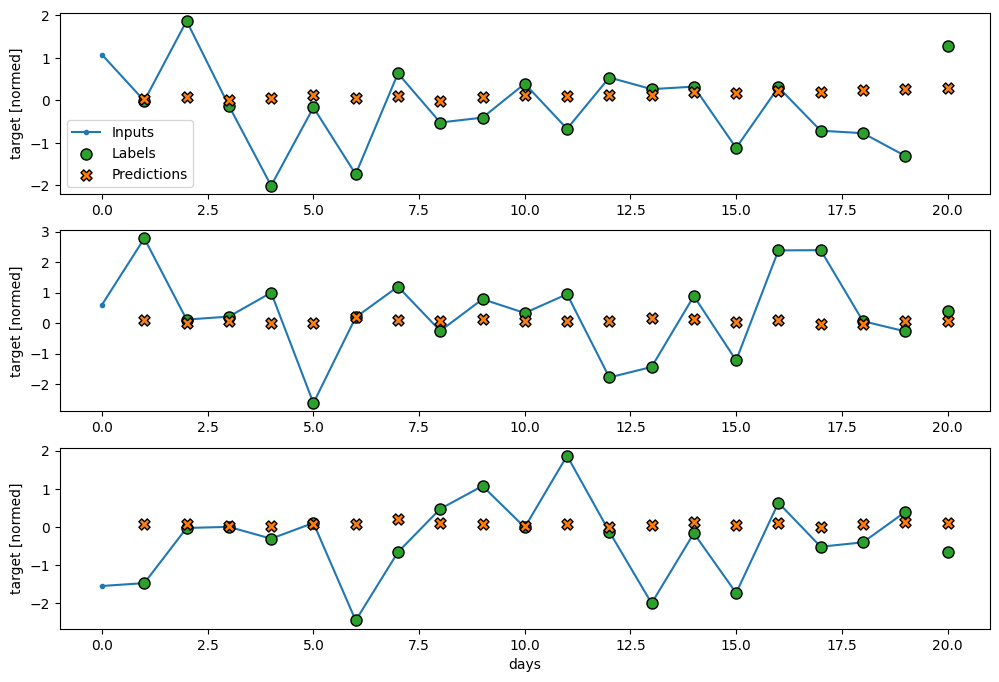

In [165]:
wide_window.plot(linear)


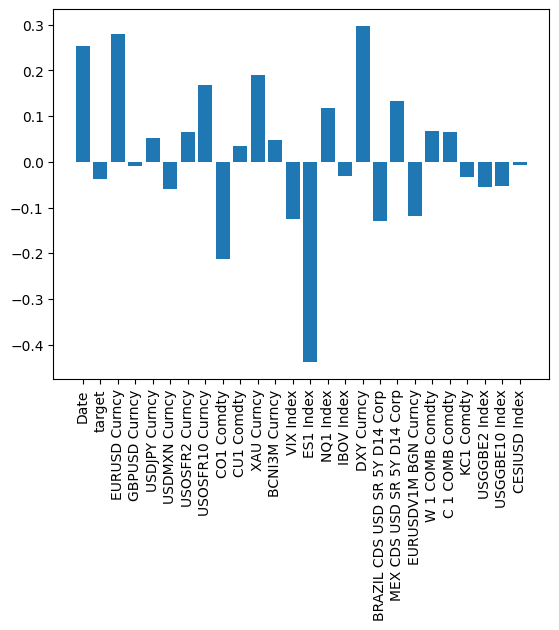

In [166]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)


In [167]:
# плотный слой

In [168]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)


Epoch 1/20
132/132 [==============================] - 3s 7ms/step - loss: 1.0574 - mean_absolute_error: 0.7262 - val_loss: 0.8940 - val_mean_absolute_error: 0.7273
Epoch 2/20
132/132 [==============================] - 1s 4ms/step - loss: 1.0137 - mean_absolute_error: 0.7103 - val_loss: 0.9114 - val_mean_absolute_error: 0.7348
Epoch 3/20
132/132 [==============================] - 1s 4ms/step - loss: 1.0044 - mean_absolute_error: 0.7066 - val_loss: 0.9201 - val_mean_absolute_error: 0.7391
Epoch 4/20
132/132 [==============================] - 1s 5ms/step - loss: 1.0024 - mean_absolute_error: 0.7062 - val_loss: 0.8786 - val_mean_absolute_error: 0.7161
Epoch 5/20
132/132 [==============================] - 1s 4ms/step - loss: 0.9992 - mean_absolute_error: 0.7048 - val_loss: 0.9017 - val_mean_absolute_error: 0.7294
Epoch 6/20
132/132 [==============================] - 1s 4ms/step - loss: 0.9859 - mean_absolute_error: 0.7011 - val_loss: 0.8790 - val_mean_absolute_error: 0.7178
Epoch 7/20
132/1

In [174]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['target'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['target']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

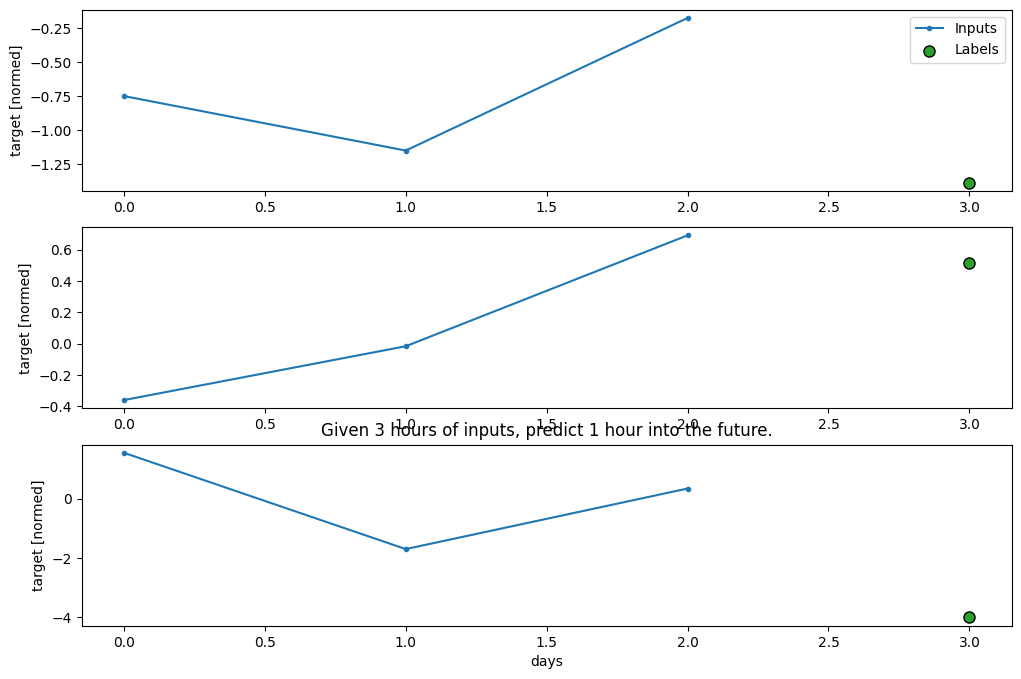

In [175]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")


In [176]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])


In [177]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)


Input shape: (20, 3, 26)
Output shape: (20, 1, 1)


In [178]:
from IPython.display import clear_output

In [179]:
history = compile_and_fit(multi_step_dense, conv_window)

#IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)


Epoch 1/100
132/132 [==============================] - 2s 5ms/step - loss: 1.0714 - mean_absolute_error: 0.7342 - val_loss: 2.0850 - val_mean_absolute_error: 1.1405
Epoch 2/100
132/132 [==============================] - 1s 4ms/step - loss: 1.0076 - mean_absolute_error: 0.7056 - val_loss: 1.6659 - val_mean_absolute_error: 0.9612
Epoch 3/100
132/132 [==============================] - 1s 4ms/step - loss: 0.9950 - mean_absolute_error: 0.7005 - val_loss: 1.6104 - val_mean_absolute_error: 0.9554
Epoch 4/100
132/132 [==============================] - 1s 4ms/step - loss: 0.9813 - mean_absolute_error: 0.6982 - val_loss: 1.3123 - val_mean_absolute_error: 0.8248
Epoch 5/100
132/132 [==============================] - 1s 4ms/step - loss: 0.9694 - mean_absolute_error: 0.6945 - val_loss: 1.3250 - val_mean_absolute_error: 0.8197
Epoch 6/100
132/132 [==============================] - 1s 5ms/step - loss: 0.9726 - mean_absolute_error: 0.6964 - val_loss: 1.1718 - val_mean_absolute_error: 0.7658
Epoch 7/10

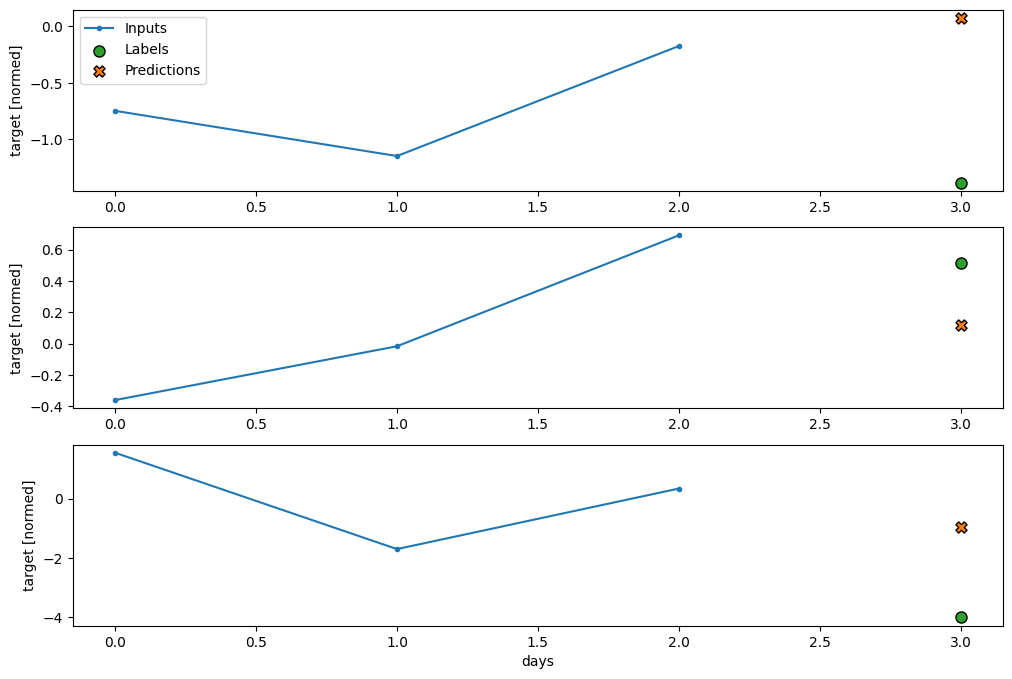

In [180]:
conv_window.plot(multi_step_dense)


In [181]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')


Input shape: (20, 20, 26)

ValueError:Exception encountered when calling layer 'sequential_5' (type Sequential).

Input 0 of layer "dense_9" is incompatible with the layer: expected axis -1 of input shape to have value 78, but received input with shape (20, 520)

Call arguments received by layer 'sequential_5' (type Sequential):
  • inputs=tf.Tensor(shape=(20, 20, 26), dtype=float32)
  • training=None
  • mask=None


In [182]:
#сверточная нейронная сеть
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])


In [183]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)


Conv model on `conv_window`
Input shape: (20, 3, 26)
Output shape: (20, 1, 1)


In [184]:
history = compile_and_fit(conv_model, conv_window)

#IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)


Epoch 1/100
132/132 [==============================] - 3s 7ms/step - loss: 1.0551 - mean_absolute_error: 0.7280 - val_loss: 0.8199 - val_mean_absolute_error: 0.6779
Epoch 2/100
132/132 [==============================] - 1s 4ms/step - loss: 1.0012 - mean_absolute_error: 0.7051 - val_loss: 0.8190 - val_mean_absolute_error: 0.6751
Epoch 3/100
132/132 [==============================] - 1s 5ms/step - loss: 0.9949 - mean_absolute_error: 0.7035 - val_loss: 0.8311 - val_mean_absolute_error: 0.6800
Epoch 4/100
132/132 [==============================] - 1s 4ms/step - loss: 0.9779 - mean_absolute_error: 0.6982 - val_loss: 0.8376 - val_mean_absolute_error: 0.6834
Epoch 5/100
132/132 [==============================] - 1s 5ms/step - loss: 0.9728 - mean_absolute_error: 0.6976 - val_loss: 0.9399 - val_mean_absolute_error: 0.7156
Epoch 6/100
132/132 [==============================] - 1s 6ms/step - loss: 0.9692 - mean_absolute_error: 0.6957 - val_loss: 0.9253 - val_mean_absolute_error: 0.7047
Epoch 7/10

In [185]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)


Wide window
Input shape: (20, 20, 26)
Labels shape: (20, 20, 1)
Output shape: (20, 18, 1)


In [186]:
LABEL_WIDTH = 20
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['target'])

wide_conv_window

Total window size: 23
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Label column name(s): ['target']

In [187]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)


Wide conv window
Input shape: (20, 22, 26)
Labels shape: (20, 20, 1)
Output shape: (20, 20, 1)


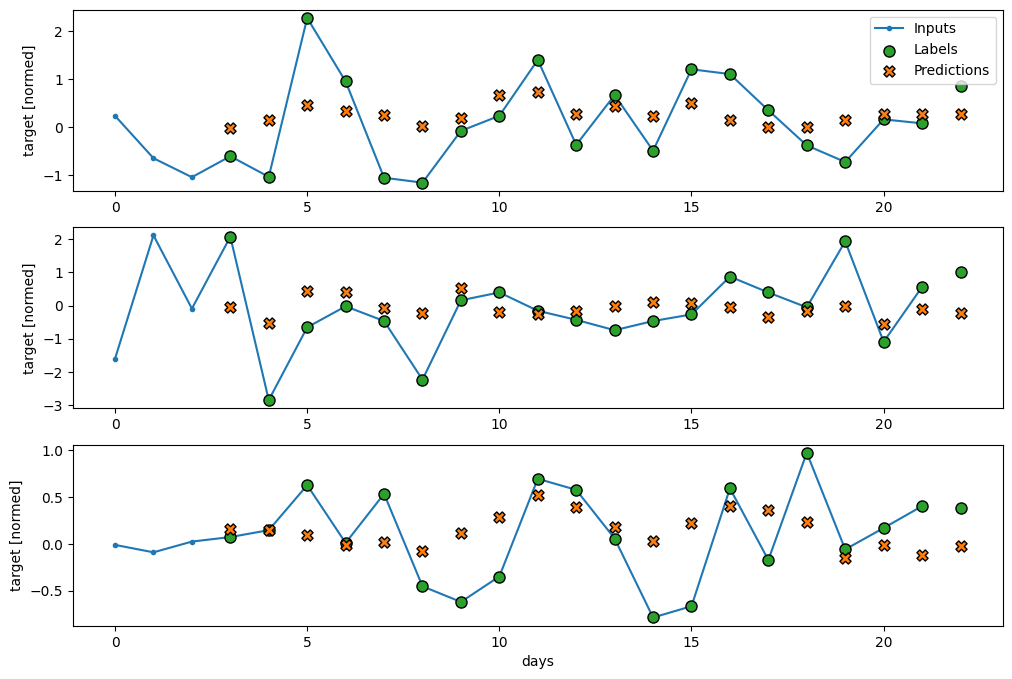

In [188]:
wide_conv_window.plot(conv_model)


In [189]:
#рекуррентная нейронная сеть lstm
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])


In [190]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)


Input shape: (20, 20, 26)
Output shape: (20, 20, 1)


In [191]:
history = compile_and_fit(lstm_model, wide_window)

#IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)


Epoch 1/100
131/131 [==============================] - 14s 24ms/step - loss: 0.9778 - mean_absolute_error: 0.6980 - val_loss: 0.9601 - val_mean_absolute_error: 0.7579
Epoch 2/100
131/131 [==============================] - 2s 14ms/step - loss: 0.9325 - mean_absolute_error: 0.6854 - val_loss: 0.9715 - val_mean_absolute_error: 0.7603
Epoch 3/100
131/131 [==============================] - 2s 15ms/step - loss: 0.9080 - mean_absolute_error: 0.6780 - val_loss: 1.0506 - val_mean_absolute_error: 0.7964
Epoch 4/100
131/131 [==============================] - 2s 14ms/step - loss: 0.8846 - mean_absolute_error: 0.6720 - val_loss: 1.0701 - val_mean_absolute_error: 0.7991
Epoch 5/100
131/131 [==============================] - 2s 15ms/step - loss: 0.8635 - mean_absolute_error: 0.6656 - val_loss: 1.1477 - val_mean_absolute_error: 0.8305
Epoch 6/100
131/131 [==============================] - 2s 14ms/step - loss: 0.8507 - mean_absolute_error: 0.6609 - val_loss: 1.2246 - val_mean_absolute_error: 0.8598
Epo

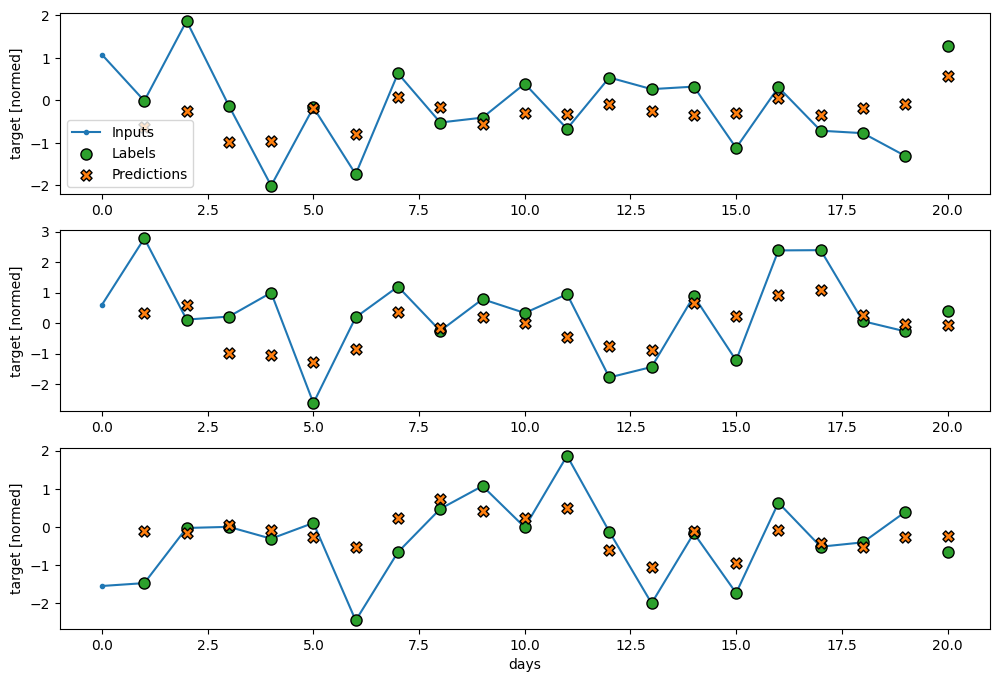

In [192]:
wide_window.plot(lstm_model)


In [ ]:
#Performance

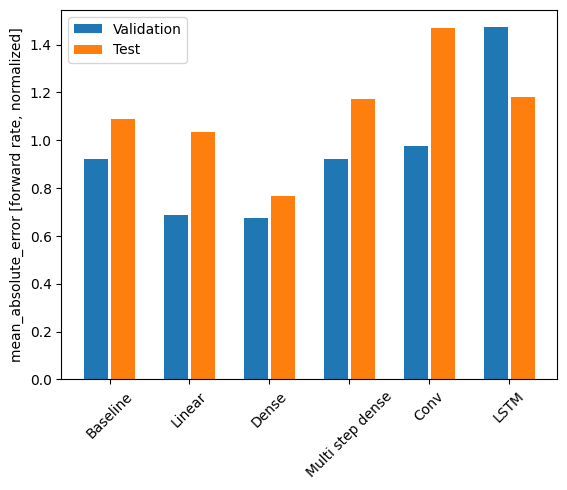

In [193]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [forward rate, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()


In [194]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')


Baseline    : 1.0907
Linear      : 1.0329
Dense       : 0.7670
Multi step dense: 1.1706
Conv        : 1.4714
LSTM        : 1.1827


In [ ]:
#несколько входов

In [195]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (20, 24, 26)
Labels shape (batch, time, features): (20, 24, 26)


In [196]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])


In [197]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)


37/37 [==============================] - 0s 2ms/step - loss: 0.0656 - mean_absolute_error: 0.0682


In [198]:
#dense
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])


In [199]:
history = compile_and_fit(dense, single_step_window)

#IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)


Epoch 1/100
132/132 [==============================] - 2s 6ms/step - loss: 0.3511 - mean_absolute_error: 0.4136 - val_loss: 1.1578 - val_mean_absolute_error: 0.7338
Epoch 2/100
132/132 [==============================] - 1s 4ms/step - loss: 0.1009 - mean_absolute_error: 0.2093 - val_loss: 0.6571 - val_mean_absolute_error: 0.5623
Epoch 3/100
132/132 [==============================] - 1s 4ms/step - loss: 0.0739 - mean_absolute_error: 0.1640 - val_loss: 0.5471 - val_mean_absolute_error: 0.5083
Epoch 4/100
132/132 [==============================] - 1s 4ms/step - loss: 0.0632 - mean_absolute_error: 0.1423 - val_loss: 0.4718 - val_mean_absolute_error: 0.4697
Epoch 5/100
132/132 [==============================] - 1s 4ms/step - loss: 0.0577 - mean_absolute_error: 0.1296 - val_loss: 0.4087 - val_mean_absolute_error: 0.4346
Epoch 6/100
132/132 [==============================] - 1s 4ms/step - loss: 0.0547 - mean_absolute_error: 0.1214 - val_loss: 0.3862 - val_mean_absolute_error: 0.4175
Epoch 7/10

In [201]:
#rnn
#%%time
wide_window = WindowGenerator(
    input_width=20, label_width=20, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

#IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()


Epoch 1/100
131/131 [==============================] - 8s 22ms/step - loss: 0.4958 - mean_absolute_error: 0.5189 - val_loss: 1.9408 - val_mean_absolute_error: 0.9404
Epoch 2/100
131/131 [==============================] - 2s 14ms/step - loss: 0.1819 - mean_absolute_error: 0.2992 - val_loss: 1.5365 - val_mean_absolute_error: 0.8210
Epoch 3/100
131/131 [==============================] - 2s 15ms/step - loss: 0.1265 - mean_absolute_error: 0.2384 - val_loss: 1.3470 - val_mean_absolute_error: 0.7558
Epoch 4/100
131/131 [==============================] - 2s 14ms/step - loss: 0.1011 - mean_absolute_error: 0.2043 - val_loss: 1.2381 - val_mean_absolute_error: 0.7146
Epoch 5/100
131/131 [==============================] - 2s 15ms/step - loss: 0.0859 - mean_absolute_error: 0.1810 - val_loss: 1.1379 - val_mean_absolute_error: 0.6766
Epoch 6/100
131/131 [==============================] - 2s 16ms/step - loss: 0.0765 - mean_absolute_error: 0.1648 - val_loss: 1.0829 - val_mean_absolute_error: 0.6558
Epoc

In [202]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [203]:
#%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

#IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()


Epoch 1/100
131/131 [==============================] - 7s 19ms/step - loss: 0.0738 - mean_absolute_error: 0.0721 - val_loss: 0.0551 - val_mean_absolute_error: 0.0670
Epoch 2/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0443 - mean_absolute_error: 0.0631 - val_loss: 0.0476 - val_mean_absolute_error: 0.0645
Epoch 3/100
131/131 [==============================] - 2s 12ms/step - loss: 0.0404 - mean_absolute_error: 0.0618 - val_loss: 0.0473 - val_mean_absolute_error: 0.0655
Epoch 4/100
131/131 [==============================] - 2s 14ms/step - loss: 0.0386 - mean_absolute_error: 0.0613 - val_loss: 0.0493 - val_mean_absolute_error: 0.0678
Epoch 5/100
131/131 [==============================] - 2s 13ms/step - loss: 0.0370 - mean_absolute_error: 0.0609 - val_loss: 0.0502 - val_mean_absolute_error: 0.0683
Epoch 6/100
131/131 [==============================] - 2s 13ms/step - loss: 0.0355 - mean_absolute_error: 0.0605 - val_loss: 0.0485 - val_mean_absolute_error: 0.0681
Epoc

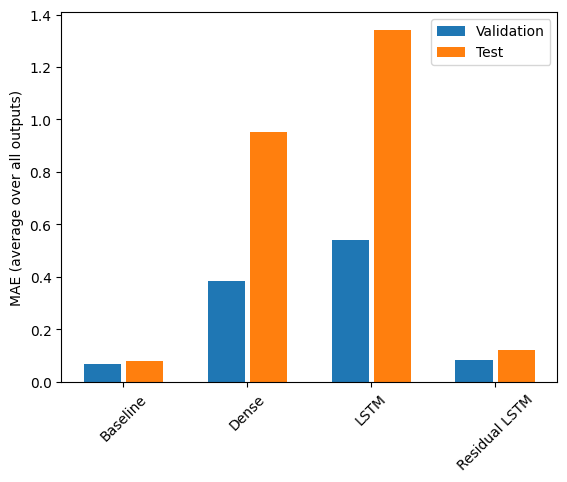

In [204]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()


In [205]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')


Baseline       : 0.0796
Dense          : 0.9542
LSTM           : 1.3426
Residual LSTM  : 0.1205


In [206]:
#multi stage

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

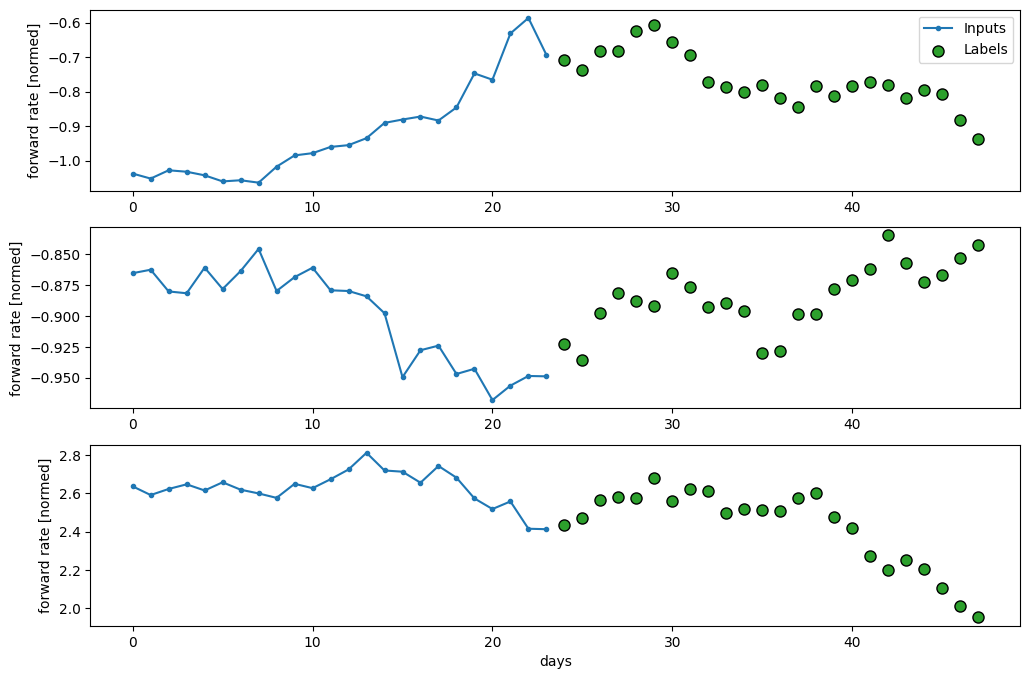

In [ ]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

22/22 [==============================] - 0s 2ms/step - loss: 0.1067 - mean_absolute_error: 0.1598


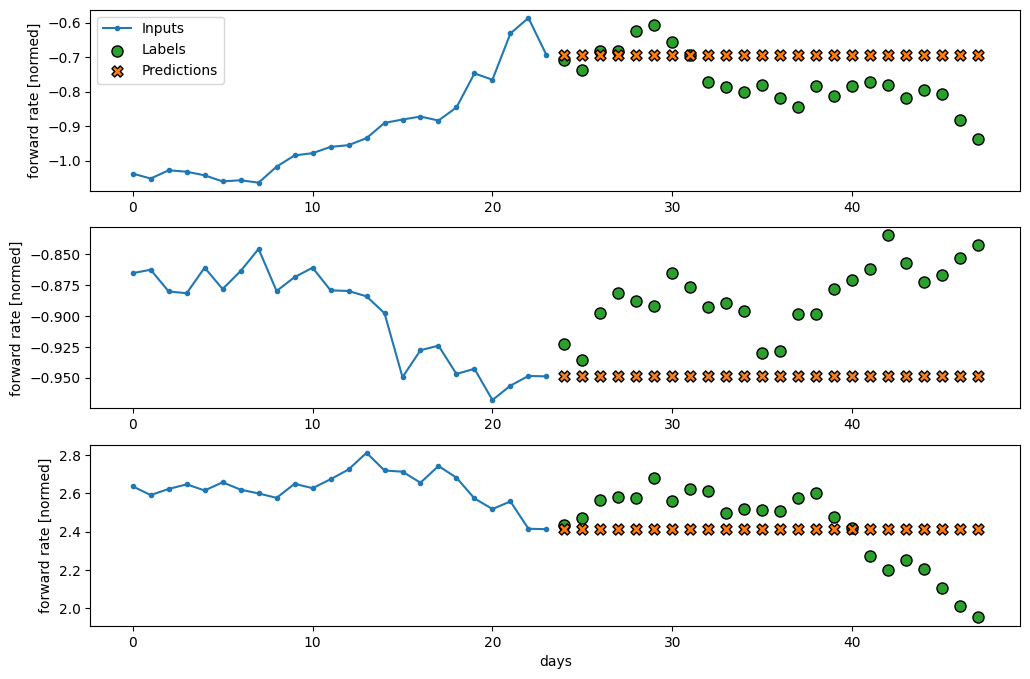

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)


22/22 [==============================] - 0s 3ms/step - loss: 0.2012 - mean_absolute_error: 0.2363


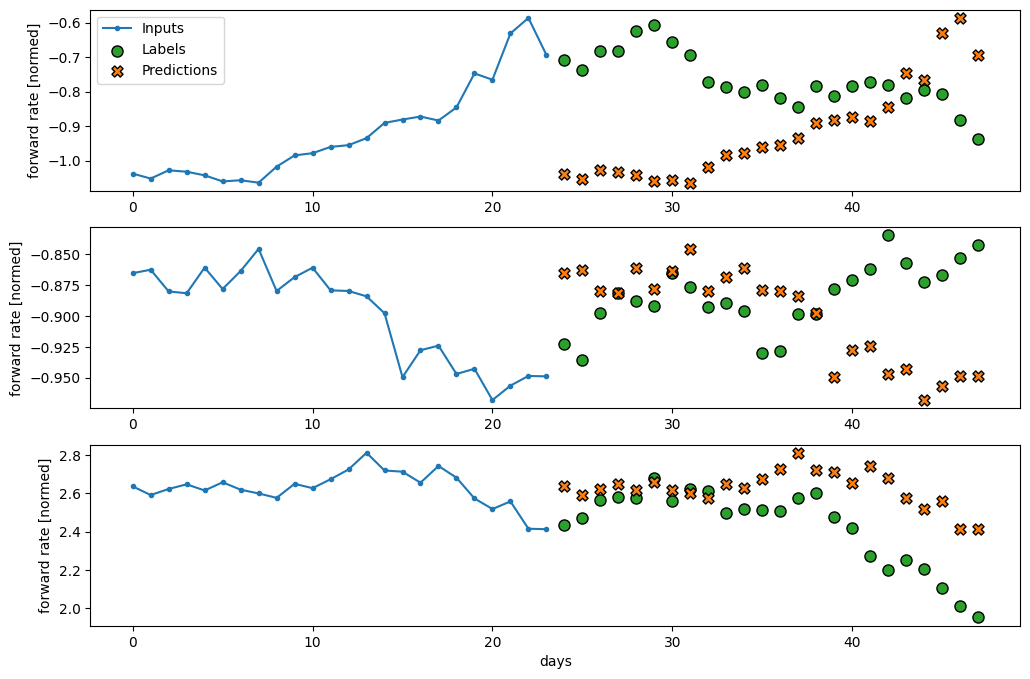

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)


Epoch 1/20
81/81 [==============================] - 1s 6ms/step - loss: 0.4786 - mean_absolute_error: 0.5173 - val_loss: 1.7119 - val_mean_absolute_error: 0.9115
Epoch 2/20
81/81 [==============================] - 0s 4ms/step - loss: 0.1962 - mean_absolute_error: 0.3180 - val_loss: 1.5297 - val_mean_absolute_error: 0.8803
Epoch 3/20
81/81 [==============================] - 0s 4ms/step - loss: 0.1502 - mean_absolute_error: 0.2741 - val_loss: 1.4664 - val_mean_absolute_error: 0.8783
Epoch 4/20
81/81 [==============================] - 0s 4ms/step - loss: 0.1285 - mean_absolute_error: 0.2516 - val_loss: 1.3978 - val_mean_absolute_error: 0.8712
Epoch 5/20
81/81 [==============================] - 0s 5ms/step - loss: 0.1141 - mean_absolute_error: 0.2355 - val_loss: 1.3036 - val_mean_absolute_error: 0.8502
Epoch 6/20
81/81 [==============================] - 0s 4ms/step - loss: 0.1035 - mean_absolute_error: 0.2229 - val_loss: 1.2222 - val_mean_absolute_error: 0.8290
Epoch 7/20
81/81 [==========

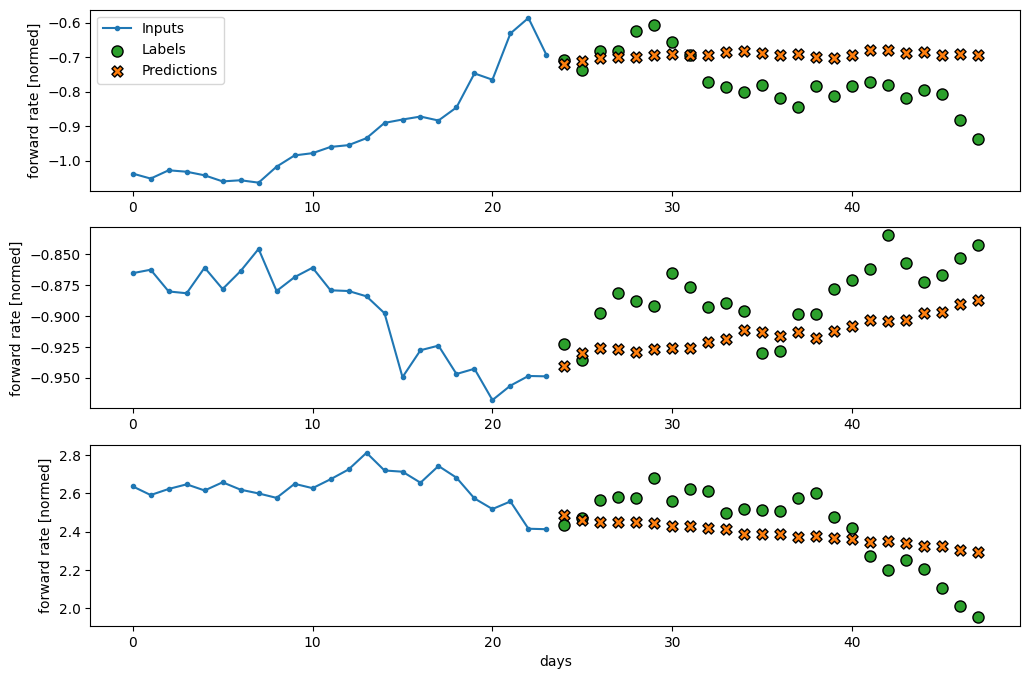

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

#IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)


Epoch 1/20
81/81 [==============================] - 2s 11ms/step - loss: 0.2140 - mean_absolute_error: 0.3125 - val_loss: 0.9595 - val_mean_absolute_error: 0.7049
Epoch 2/20
81/81 [==============================] - 1s 10ms/step - loss: 0.0631 - mean_absolute_error: 0.1669 - val_loss: 0.7808 - val_mean_absolute_error: 0.6264
Epoch 3/20
81/81 [==============================] - 1s 10ms/step - loss: 0.0508 - mean_absolute_error: 0.1469 - val_loss: 0.6958 - val_mean_absolute_error: 0.5874
Epoch 4/20
81/81 [==============================] - 1s 9ms/step - loss: 0.0455 - mean_absolute_error: 0.1379 - val_loss: 0.6207 - val_mean_absolute_error: 0.5426
Epoch 5/20
81/81 [==============================] - 1s 9ms/step - loss: 0.0423 - mean_absolute_error: 0.1326 - val_loss: 0.5826 - val_mean_absolute_error: 0.5202
Epoch 6/20
81/81 [==============================] - 1s 11ms/step - loss: 0.0401 - mean_absolute_error: 0.1292 - val_loss: 0.5534 - val_mean_absolute_error: 0.4999
Epoch 7/20
81/81 [======

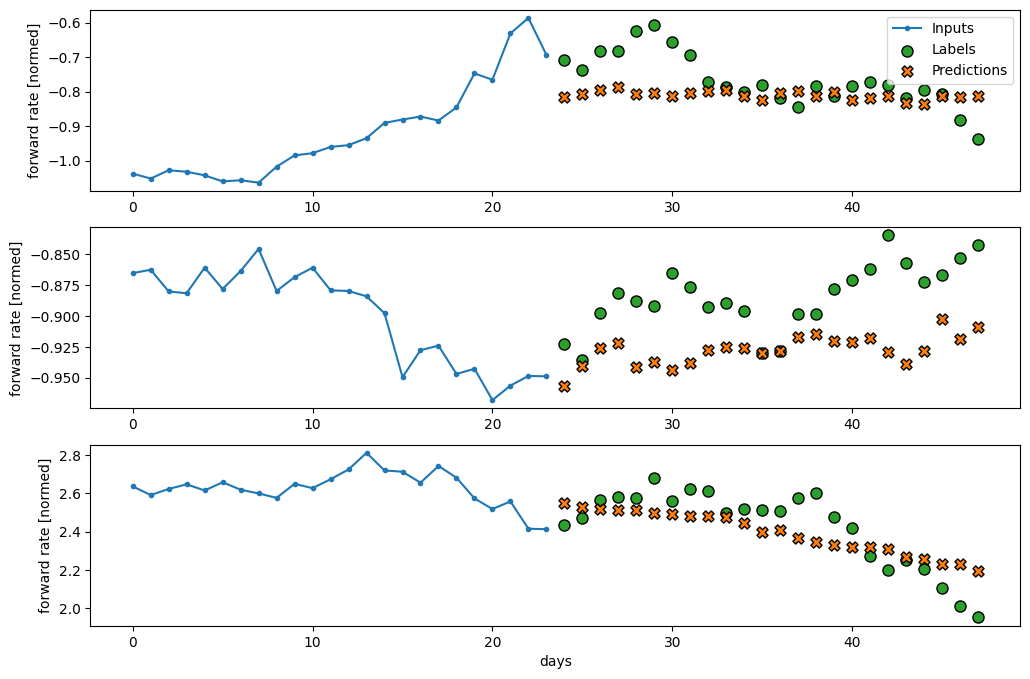

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

#IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)


Epoch 1/20
81/81 [==============================] - 2s 8ms/step - loss: 0.2338 - mean_absolute_error: 0.3317 - val_loss: 1.1073 - val_mean_absolute_error: 0.7495
Epoch 2/20
81/81 [==============================] - 1s 6ms/step - loss: 0.0723 - mean_absolute_error: 0.1819 - val_loss: 0.9124 - val_mean_absolute_error: 0.6597
Epoch 3/20
81/81 [==============================] - 1s 6ms/step - loss: 0.0555 - mean_absolute_error: 0.1565 - val_loss: 0.8817 - val_mean_absolute_error: 0.6456
Epoch 4/20
81/81 [==============================] - 1s 6ms/step - loss: 0.0489 - mean_absolute_error: 0.1458 - val_loss: 0.7719 - val_mean_absolute_error: 0.6002
Epoch 5/20
81/81 [==============================] - 1s 6ms/step - loss: 0.0447 - mean_absolute_error: 0.1386 - val_loss: 0.7241 - val_mean_absolute_error: 0.5772
Epoch 6/20
81/81 [==============================] - 1s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.1338 - val_loss: 0.6812 - val_mean_absolute_error: 0.5559
Epoch 7/20
81/81 [==========

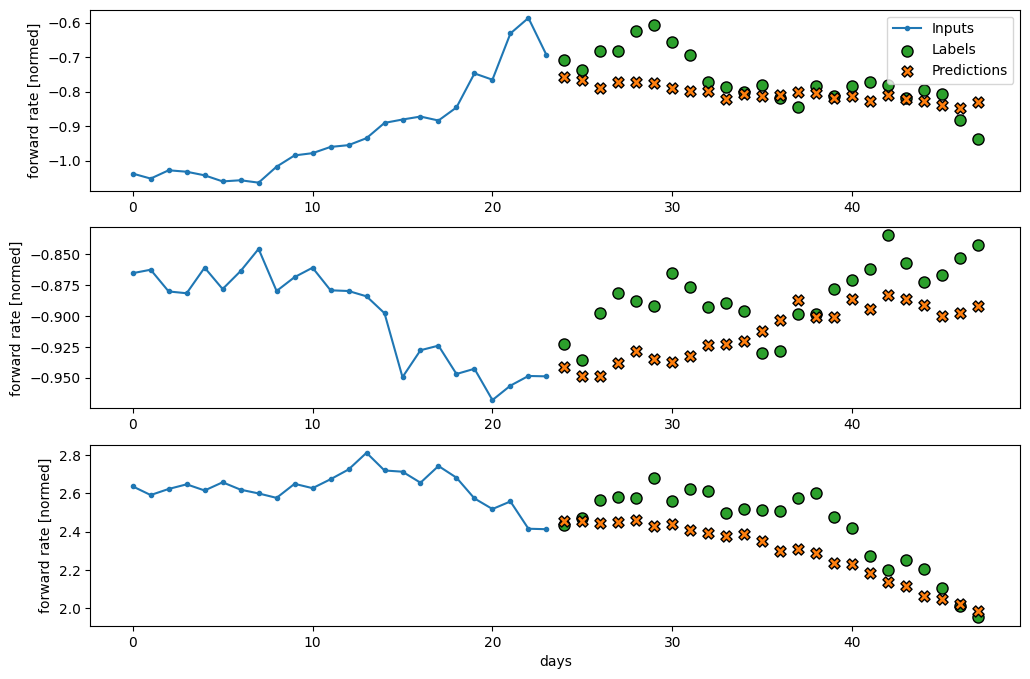

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

#IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)


Epoch 1/20
81/81 [==============================] - 5s 22ms/step - loss: 0.6116 - mean_absolute_error: 0.5882 - val_loss: 2.3011 - val_mean_absolute_error: 1.0833
Epoch 2/20
81/81 [==============================] - 1s 14ms/step - loss: 0.2699 - mean_absolute_error: 0.3694 - val_loss: 2.1274 - val_mean_absolute_error: 1.0500
Epoch 3/20
81/81 [==============================] - 1s 14ms/step - loss: 0.1727 - mean_absolute_error: 0.2931 - val_loss: 1.9012 - val_mean_absolute_error: 0.9856
Epoch 4/20
81/81 [==============================] - 1s 13ms/step - loss: 0.1212 - mean_absolute_error: 0.2438 - val_loss: 1.7489 - val_mean_absolute_error: 0.9466
Epoch 5/20
81/81 [==============================] - 1s 16ms/step - loss: 0.0968 - mean_absolute_error: 0.2168 - val_loss: 1.7064 - val_mean_absolute_error: 0.9340
Epoch 6/20
81/81 [==============================] - 1s 13ms/step - loss: 0.0817 - mean_absolute_error: 0.1989 - val_loss: 1.7044 - val_mean_absolute_error: 0.9328
Epoch 7/20
81/81 [====

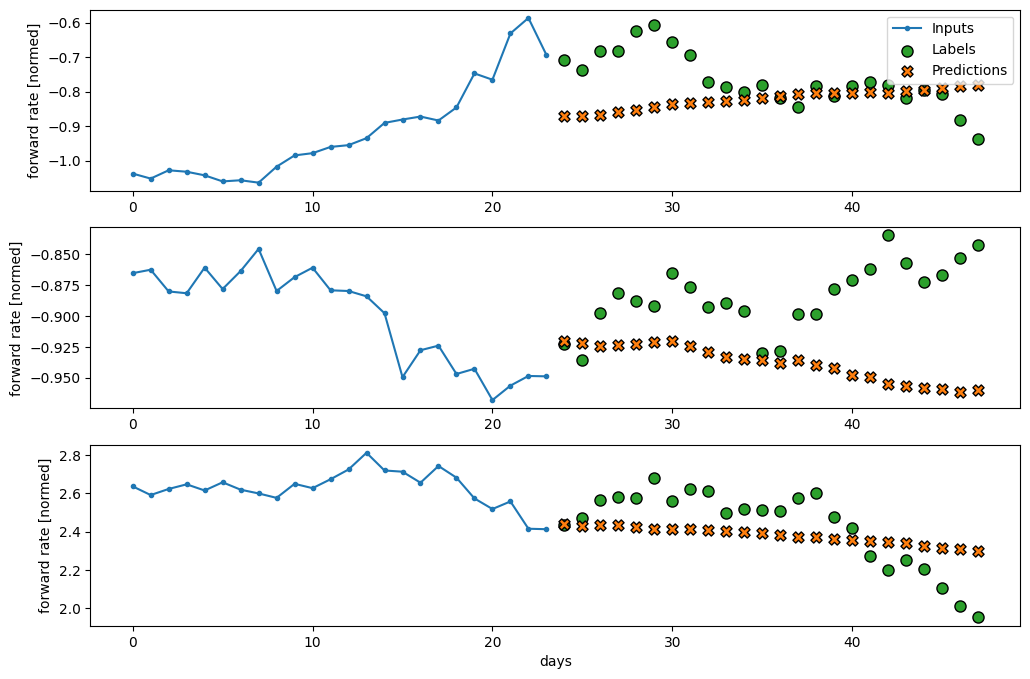

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

#IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)


In [ ]:
#авторегрессионная модель
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)


In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)


In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 29])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)


Output shape (batch, time, features):  (32, 24, 29)


Epoch 1/20
81/81 [==============================] - 10s 34ms/step - loss: 0.6251 - mean_absolute_error: 0.5983 - val_loss: 2.2623 - val_mean_absolute_error: 1.0565
Epoch 2/20
81/81 [==============================] - 2s 23ms/step - loss: 0.2600 - mean_absolute_error: 0.3737 - val_loss: 1.8310 - val_mean_absolute_error: 0.9413
Epoch 3/20
81/81 [==============================] - 2s 22ms/step - loss: 0.1803 - mean_absolute_error: 0.3053 - val_loss: 1.7184 - val_mean_absolute_error: 0.9194
Epoch 4/20
81/81 [==============================] - 2s 24ms/step - loss: 0.1475 - mean_absolute_error: 0.2730 - val_loss: 1.6186 - val_mean_absolute_error: 0.8933
Epoch 5/20
81/81 [==============================] - 2s 21ms/step - loss: 0.1296 - mean_absolute_error: 0.2534 - val_loss: 1.6341 - val_mean_absolute_error: 0.8913
Epoch 6/20
81/81 [==============================] - 2s 23ms/step - loss: 0.1111 - mean_absolute_error: 0.2356 - val_loss: 1.5982 - val_mean_absolute_error: 0.8823
Epoch 7/20
81/81 [===

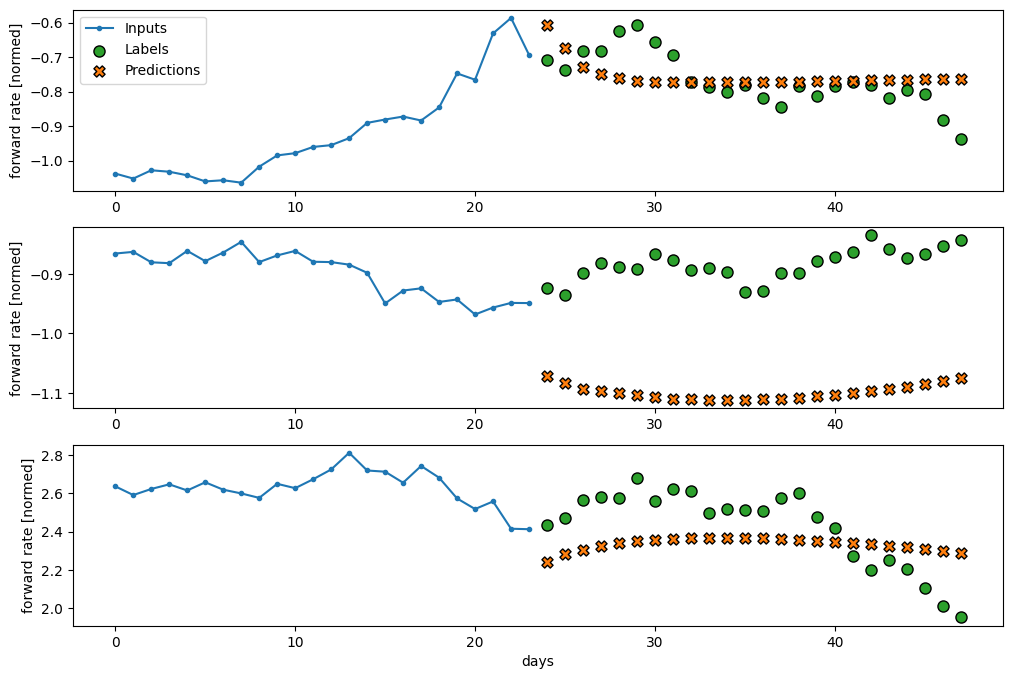

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

#IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)


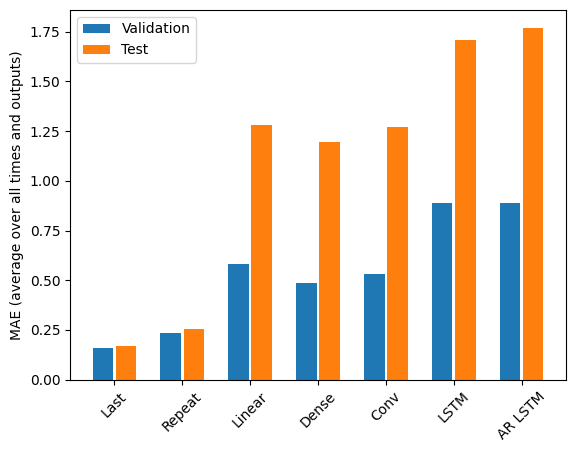

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()


In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')


Last    : 0.1713
Repeat  : 0.2521
Linear  : 1.2786
Dense   : 1.1971
Conv    : 1.2718
LSTM    : 1.7082
AR LSTM : 1.7710
